# コンペティション
## House Prices
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## 目的
アイオワ州エイムズの住宅の79の説明変数で各住宅の最終価格を予測する

## 目標
SalePrice 変数の値を予測

## 評価指標
予測値の対数と観察された販売価格の対数との間のRMSEで評価
（対数→高価な住宅と安価な住宅の予測誤差が同じように結果に影響する）

## ファイル形式
ヘッダーを含む以下の形式
sample_submission.csv
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.

## 今回のコンペで得られること
- Pythonによる包括的なデータ探索
- 住宅価格のEDA
- 欠損データと分部の調査をするための可視化テクニック
- 相関ヒートマップ、ペアプロット、t-SNEを含み、線形モデルの学習
- scikit-learnを使用して、ridge,LASSO,ElasticNetを含む様々な正則化手法による線形回帰を探索する
- XGBoostやKerasを使用したニューラルネットなど、より高度なアルゴリズムを試す

# 問題の定義

## 問題点

- 欠損データが含まれている
- 説明変数で成り立っている

## データ

### ファイル構成
- train.csv - the training set
- test.csv - the test set
- data_description.txt - ディーン・デ・コックによって作成された各コラムの説明文。
- sample_submission.csv - 販売年、販売月、敷地面積、寝室数に対する線形回帰によるベンチマーク

### Data fields
Here's a brief version of what you'll find in the data description file.


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


## 目的の確認
目的：テストデータの住宅価格を予測する
条件：予測値の対数と観察された販売価格の対数との間のRMSEで評価される

# データの収集と前処理

## データの収集

In [ ]:
# Google Driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import pandas as pd
import numpy as np

# それぞれのデータを読み込んでいく
# ディレクトリのpathを取得
data_path = glob.glob('**/house_prices', recursive = True)[0]

data_path

'drive/MyDrive/Colab Notebooks/house_prices'

In [ ]:
# 各ファイルを取得してDF型に変換
df_train = pd.read_csv(data_path + '/' + 'train.csv')
df_test = pd.read_csv(data_path + '/' + 'test.csv')
df_sample = pd.read_csv(data_path + '/' + 'sample_submission.csv')

# ディスクリプションは一旦表示してみる
data_desc = open(data_path + '/' + 'data_description.txt', 'r')
datalist = data_desc.readlines()
for data in datalist:
  print(data)

data_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [ ]:
# trainデータから確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

81このカラムがあり、最終列に住宅の価格（SalePrice）がある
欠損値もかなり含まれており、前処理が必要である


In [ ]:
# testデータの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

80カラムからなっており、欠損値を多く含むため、前処理が必要

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


IdとSalePriceの2カラムのみで提出データのサンプルを表している。
データ数は1459個である

具体的な前処理のイメージをするためにより詳しく見ていく

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# 列の情報を抽出する
column_exp = []
for line in datalist:
  if ':' in line and not 'story: 2nd level' in line:
    column_exp.append(line)

print(f"列情報の大きさ：{len(column_exp)}")
column_exp

列情報の大きさ：79


['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 'LotFrontage: Linear feet of street connected to property\n',
 'LotArea: Lot size in square feet\n',
 'Street: Type of road access to property\n',
 'Alley: Type of alley access to property\n',
 'LotShape: General shape of property\n',
 'LandContour: Flatness of the property\n',
 'Utilities: Type of utilities available\n',
 'LotConfig: Lot configuration\n',
 'LandSlope: Slope of property\n',
 'Neighborhood: Physical locations within Ames city limits\n',
 'Condition1: Proximity to various conditions\n',
 'Condition2: Proximity to various conditions (if more than one is present)\n',
 'BldgType: Type of dwelling\n',
 'HouseStyle: Style of dwelling\n',
 'OverallQual: Rates the overall material and finish of the house\n',
 'OverallCond: Rates the overall condition of the house\n',
 'YearBuilt: Original construction date\n',
 'YearRemodAdd: Remod

ディスクリプションにはIdとSalesPriceの二つを除いた説明がされている。

In [ ]:
# 統計情報を確認
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


数値：38つ　/ オブジェクト：43つ

In [ ]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


HousePricesデータは、80つの特徴量（説明変数）と1つの目的変数からなるデータである
また、カテゴリカルデータと量的データが混ざり合っている

## テストデータの前処理

In [ ]:
# 欠損値のある列情報を抽出
null_columns = df_test.columns[df_test.isnull().any()]
print(f"欠損値のある列の数：{len(null_columns)}")
null_columns

欠損値のある列の数：33


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

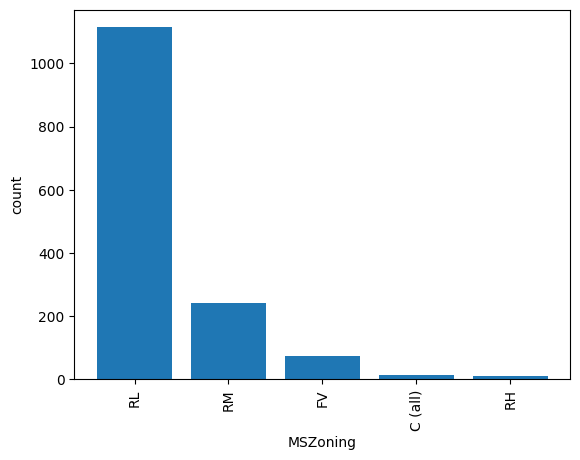

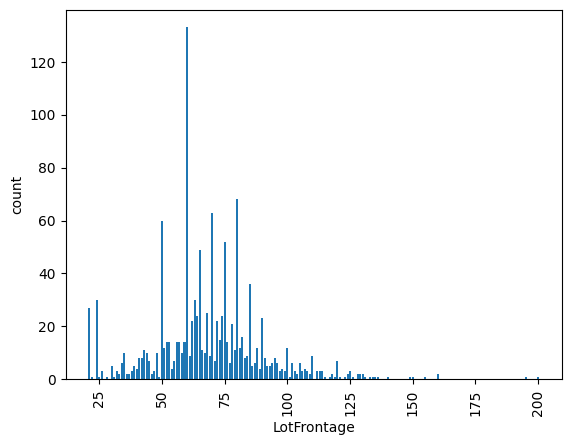

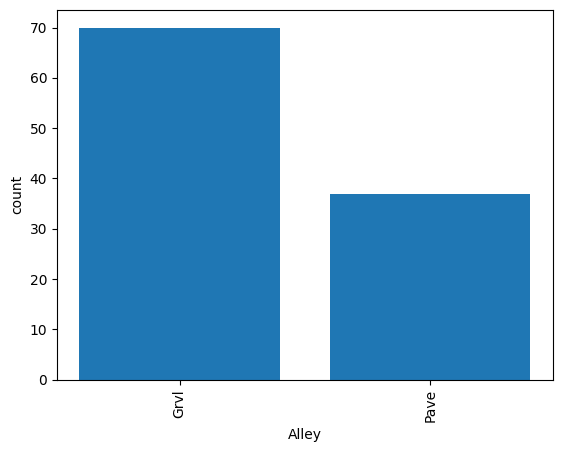

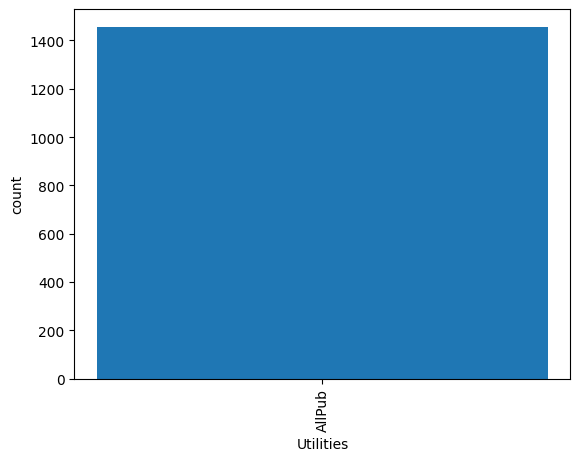

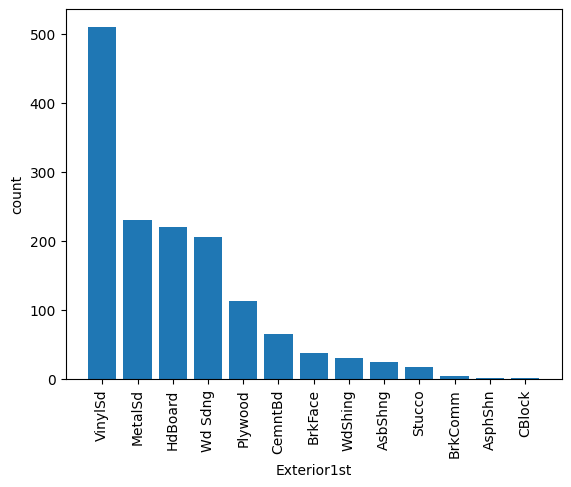

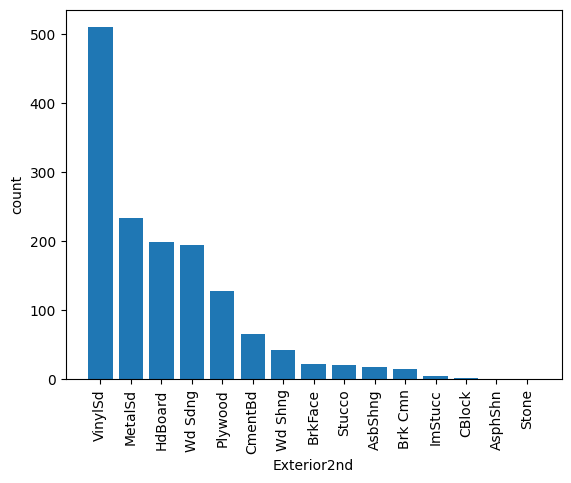

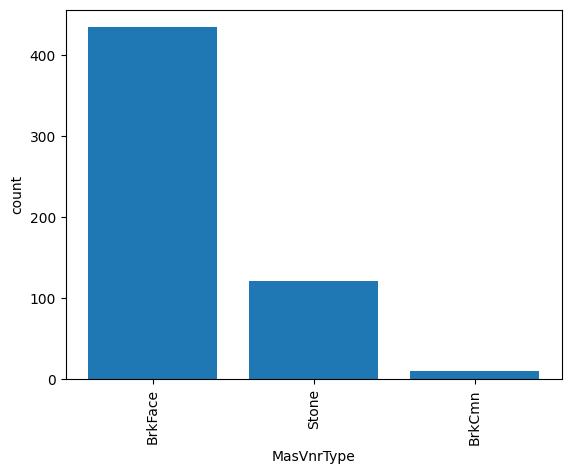

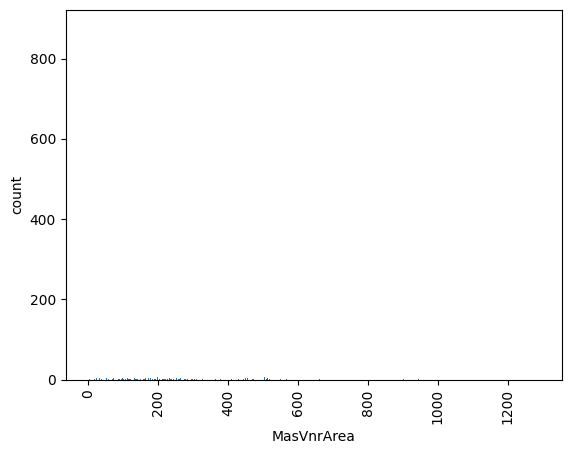

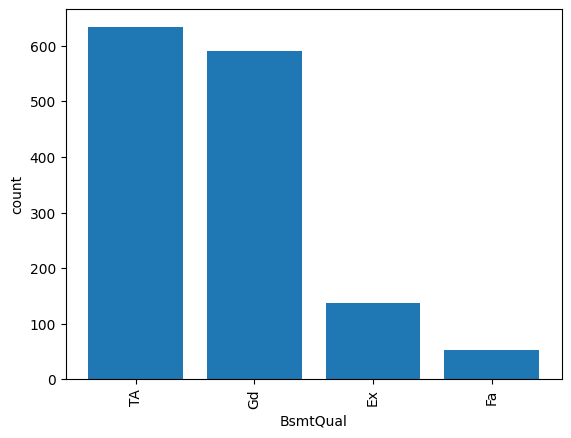

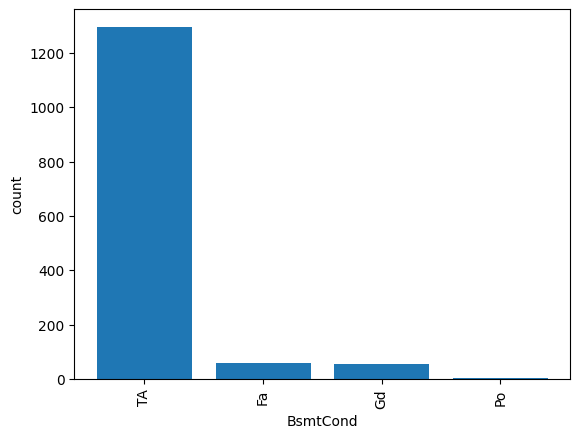

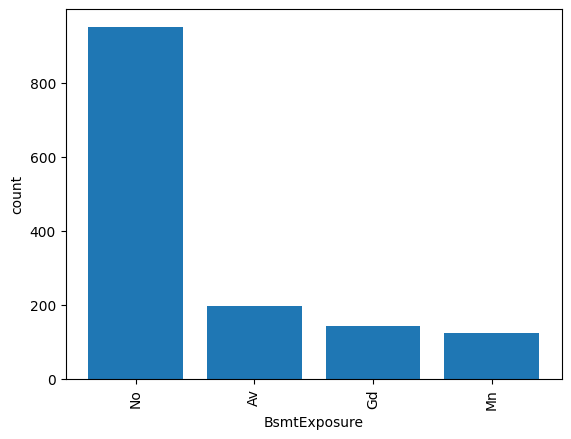

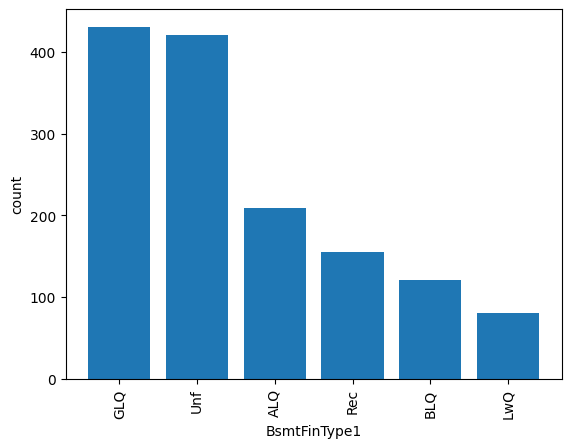

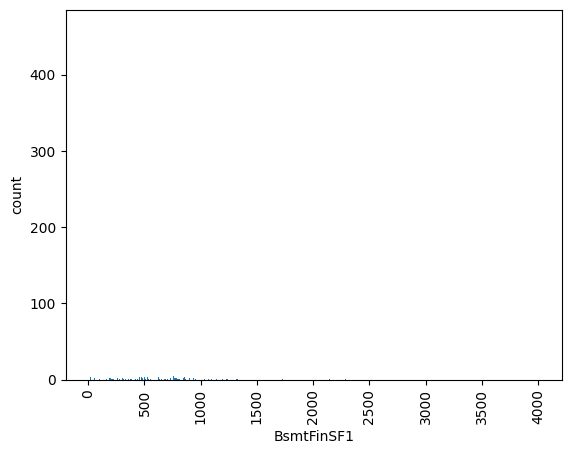

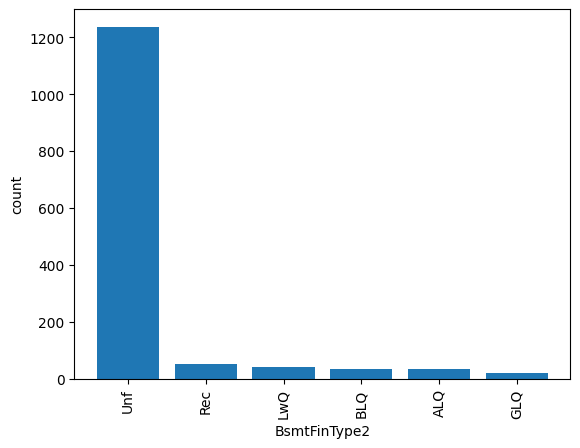

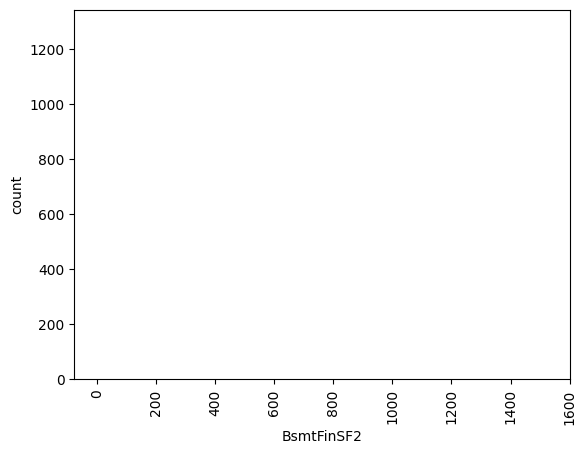

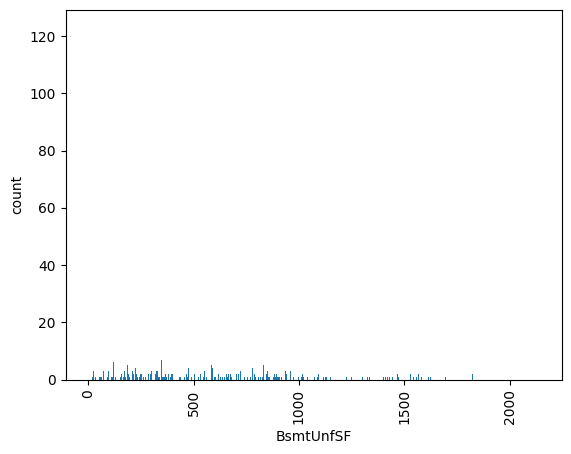

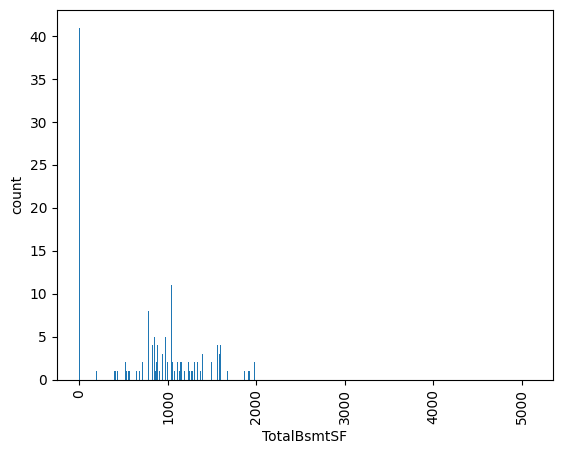

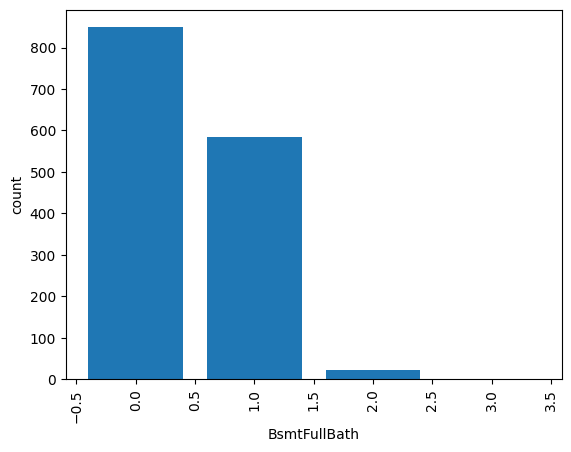

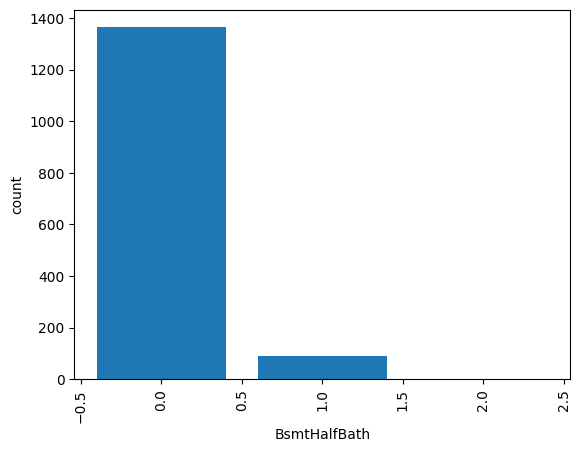

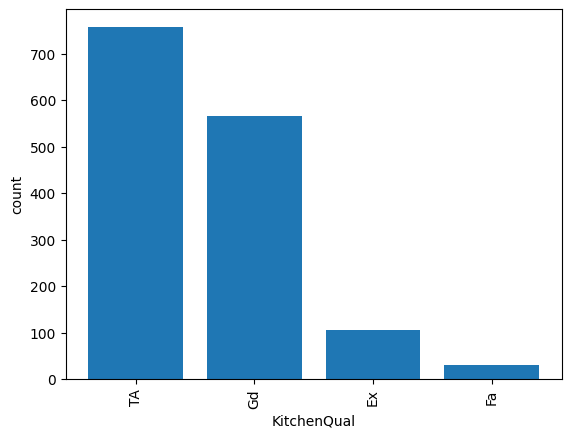

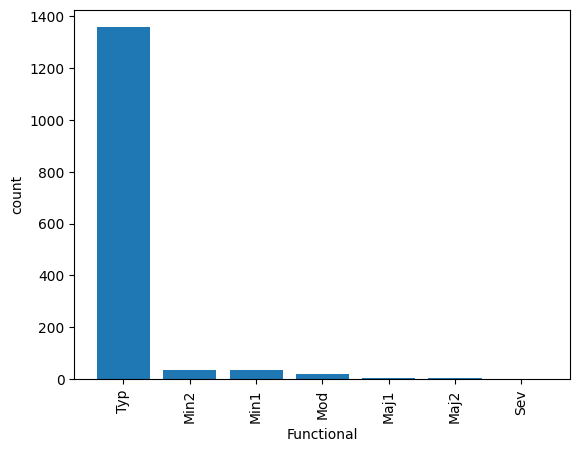

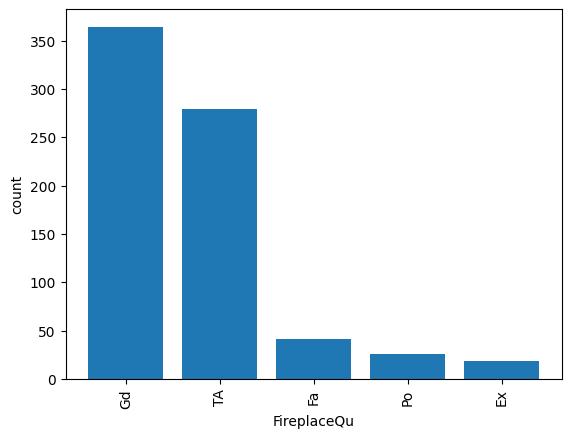

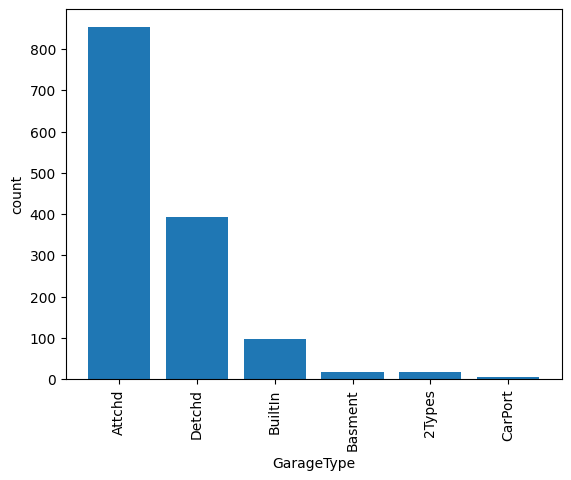

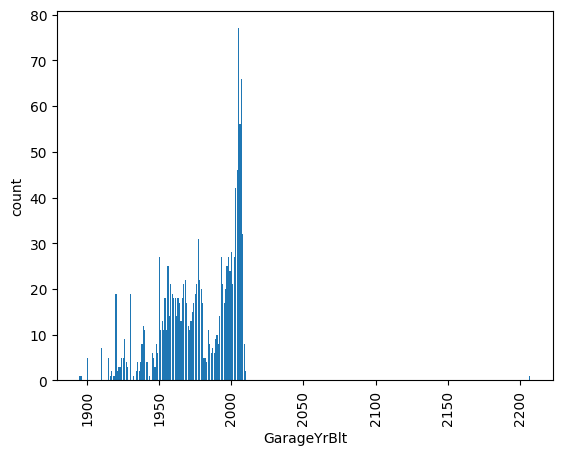

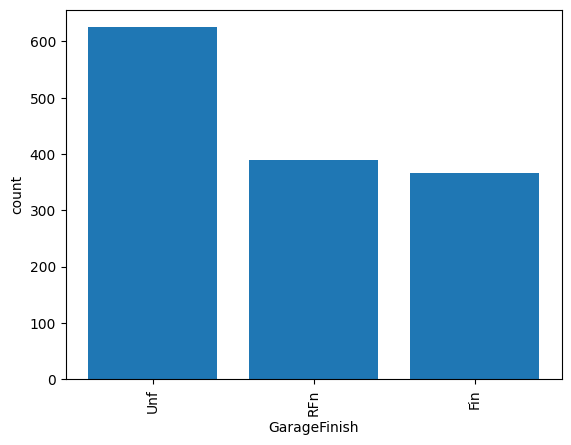

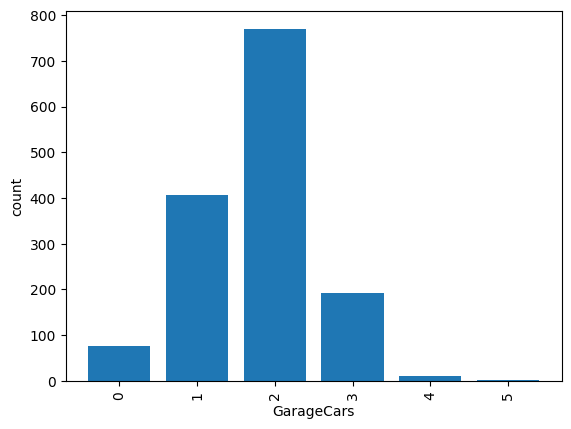

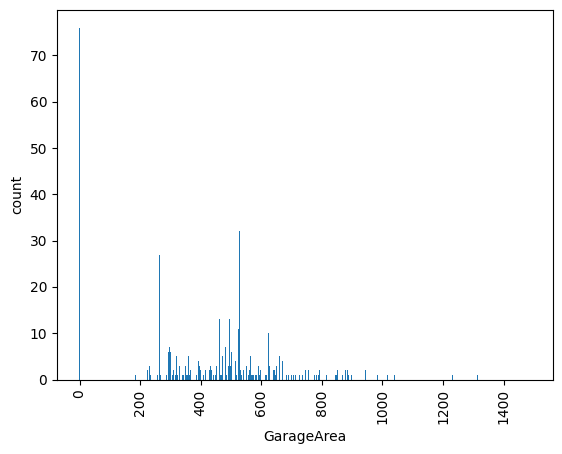

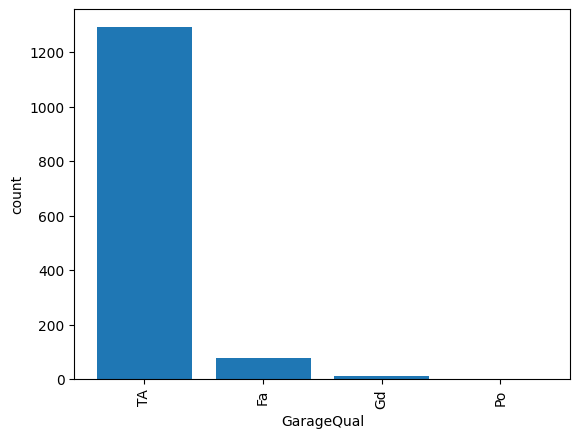

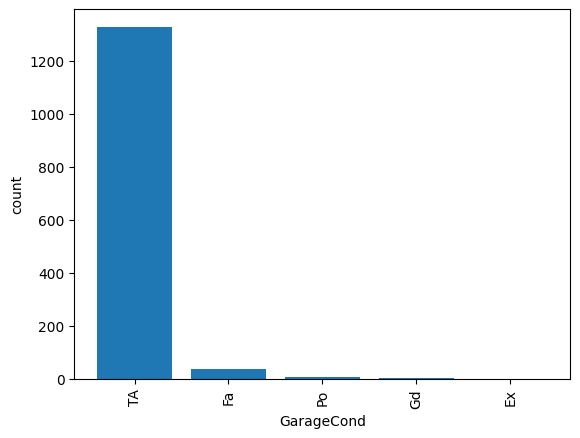

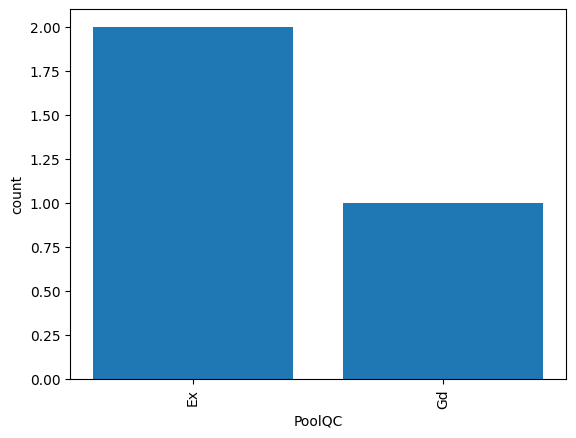

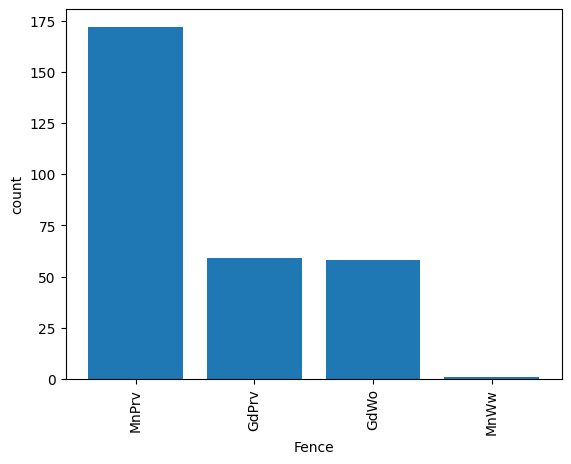

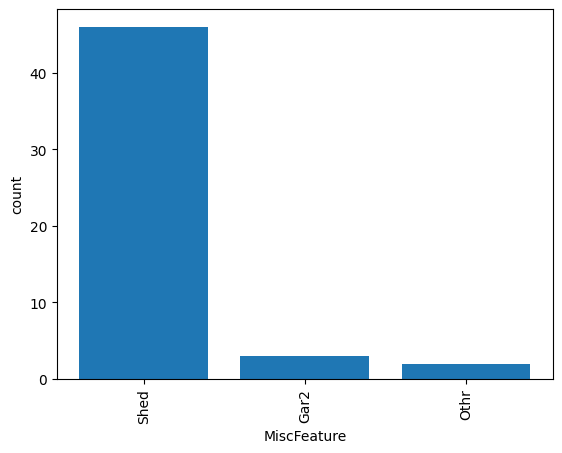

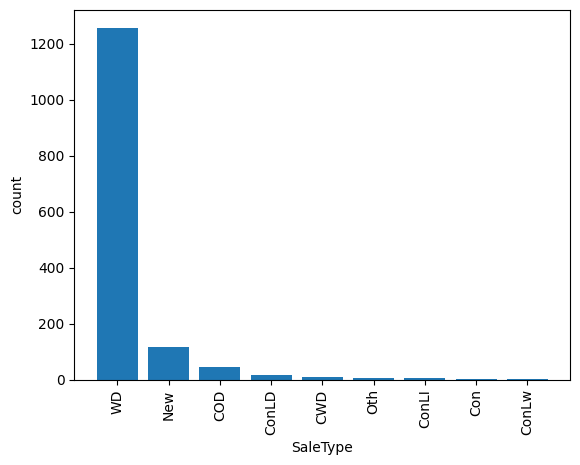

In [ ]:
import matplotlib.pyplot as plt

# 欠損値のある列情報を可視化
for i in range(len(null_columns)):
  counts = df_test[null_columns[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(null_columns[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

NULLが意味を持つ場合があり、それは文字列"NA"として処理する

In [ ]:
# NULLが意味を持つ列名のリスト
mean_null = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
print(f"NULLが意味を持つ列数：{len(mean_null)}")

# 確認のためNAを含む行の情報を抽出する
contain_na = []
for line in datalist:
  if 'NA' in line:
    contain_na.append(line.replace("\t", ":").replace("\n", ""))

print(f"NAを含む行：{contain_na}")
print(f"NAを含む行数：{len(contain_na)}")

NULLが意味を持つ列数：14
NAを含む行：['       NA :No alley access', '       NA:No Basement', '       NA:No Basement', '       NA:No Basement', '       NA:No Basement', '       NA:No Basement', '       NA:No Fireplace', '       NA:No Garage', '       NA:No Garage', '       NA:No Garage', '       NA:No Garage', '       NA:No Pool', '       NA:No Fence', '       NA:None']
NAを含む行数：14


In [ ]:
# 上記に該当する列の欠損値をNAに変更
df_test_1 = df_test.copy()
df_test_1[mean_null] = df_test[mean_null].fillna("NA")
df_test_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

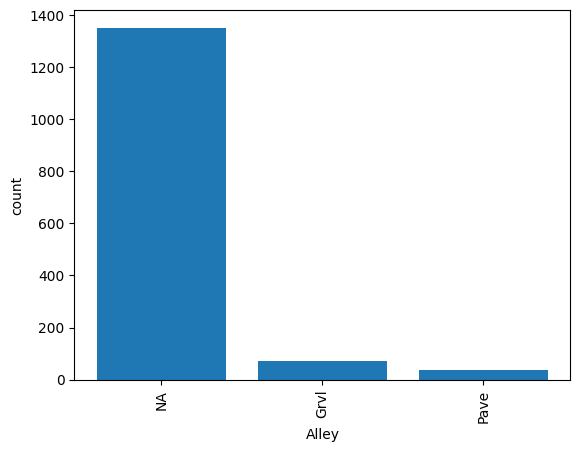

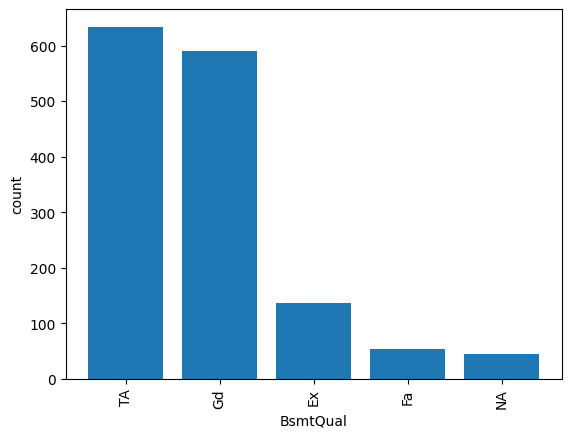

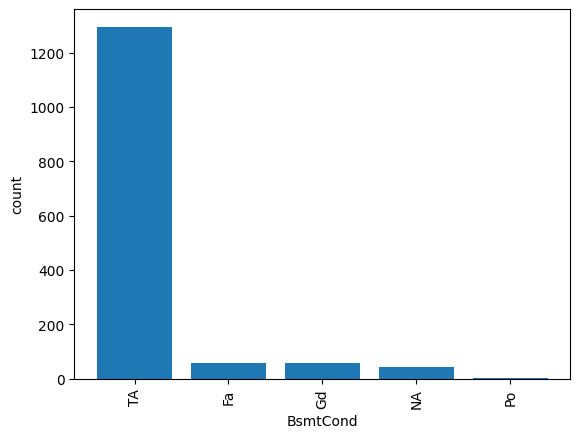

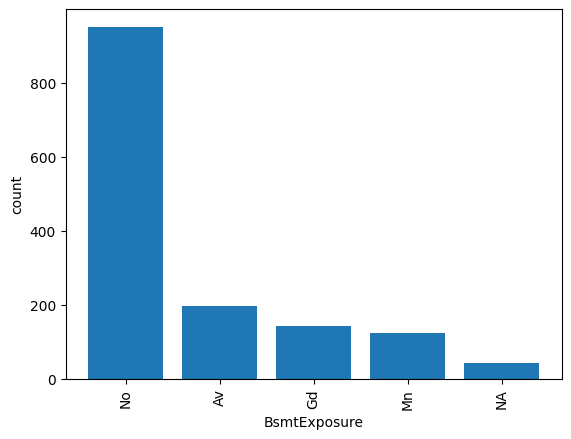

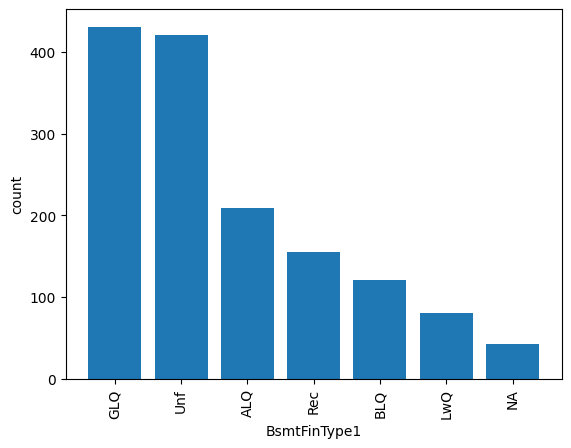

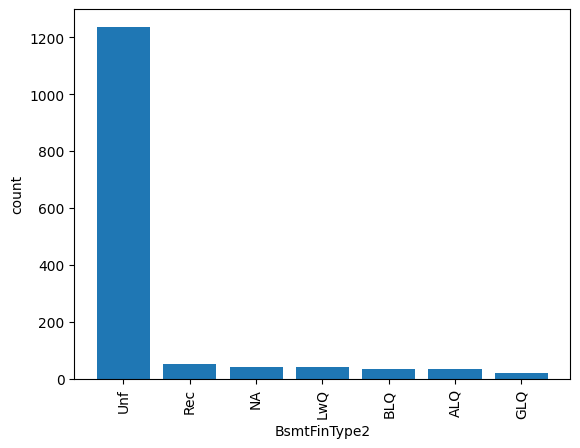

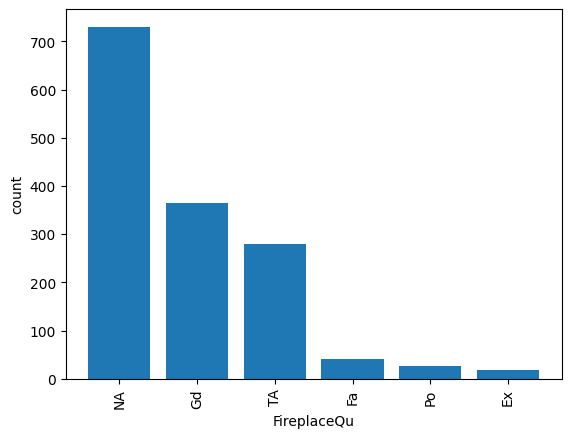

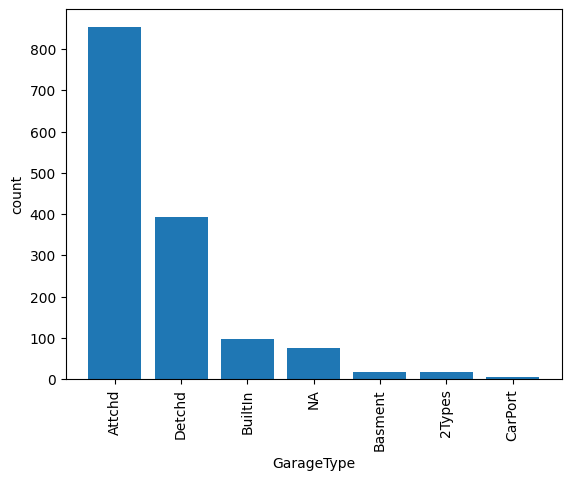

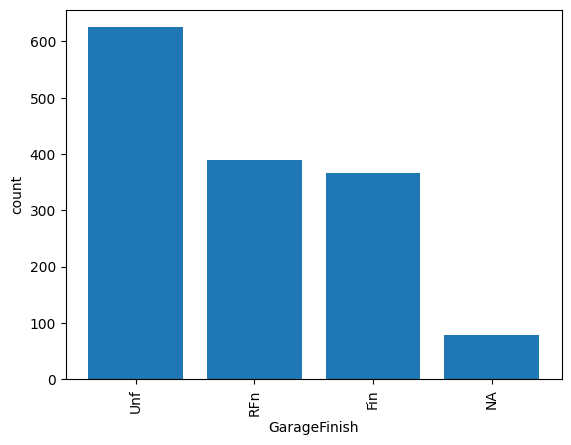

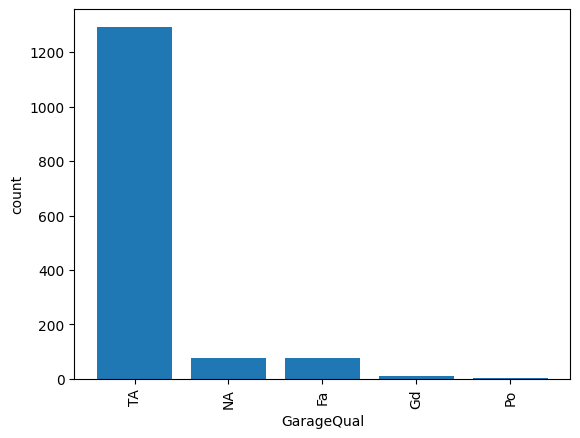

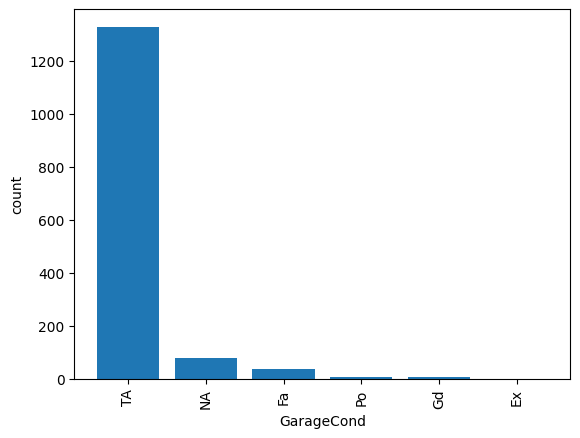

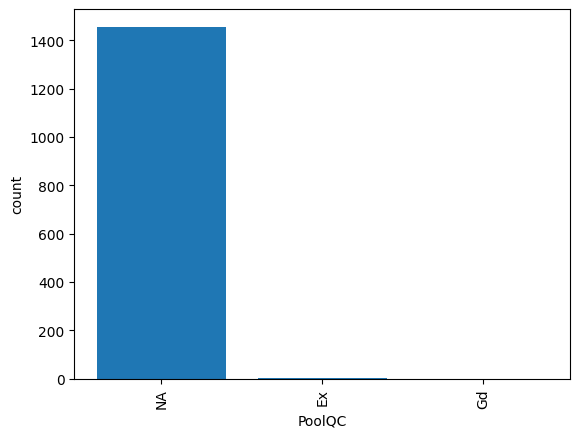

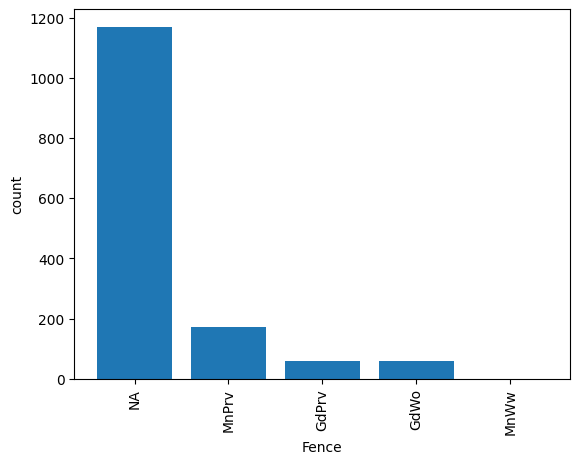

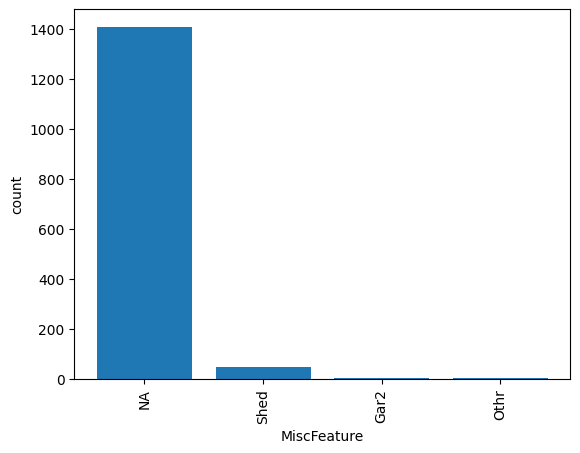

In [ ]:
# 欠損値を"NA"で補完した列情報を可視化
for i in range(len(mean_null)):
  counts = df_test_1[mean_null[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(mean_null[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

'Utilities'は観測されるデータが、"AllPub"のみのため欠損値は"AllPub"で補完する

In [ ]:
# Utilitiesを"AllPub"で補完
df_test_1[["Utilities"]] = df_test_1[["Utilities"]].fillna("AllPub")

33列の欠損値情報のうちから14列の欠損値情報を"NA"で満たし、"Utilities"の処理もしたたため、残りの処理は18列になるはず

In [ ]:
# 欠損値のある列情報を抽出
null_columns_1 = df_test_1.columns[df_test_1.isnull().any()]
print(f"欠損値のある列の数：{len(null_columns_1)}")
null_columns_1

欠損値のある列の数：18


Index(['MSZoning', 'LotFrontage', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

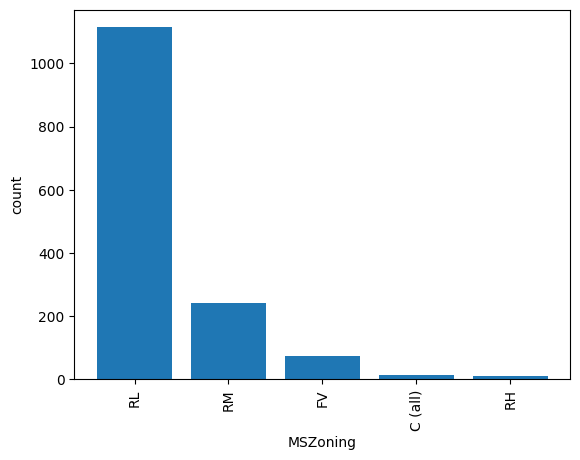

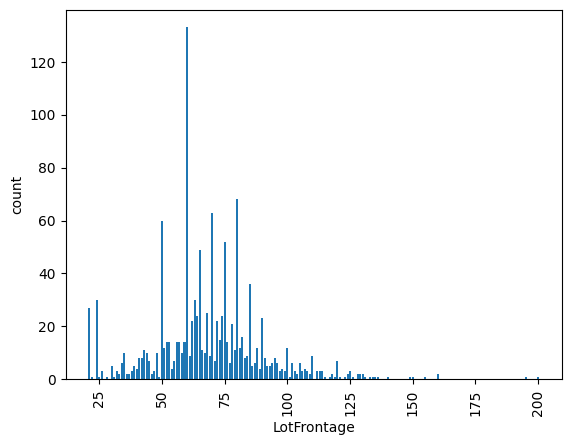

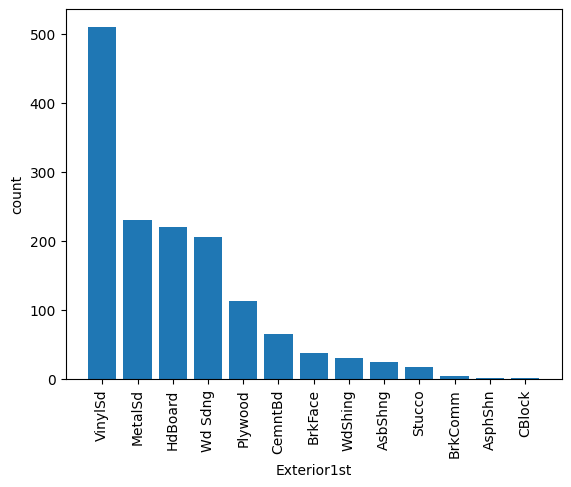

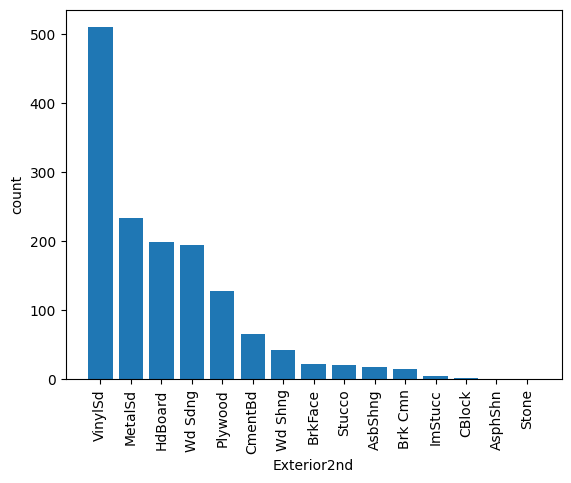

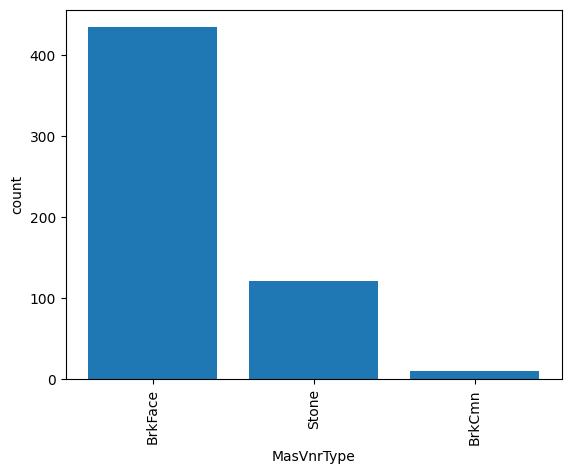

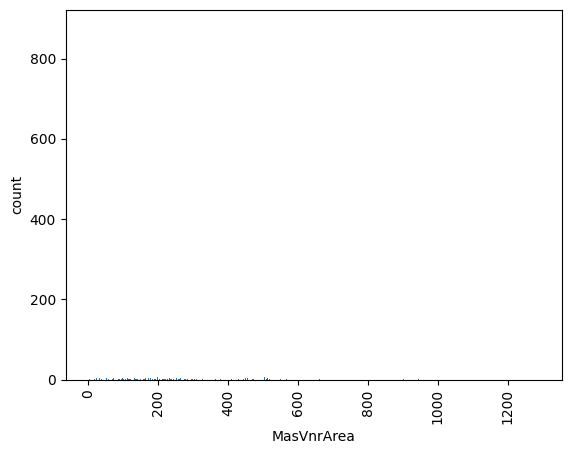

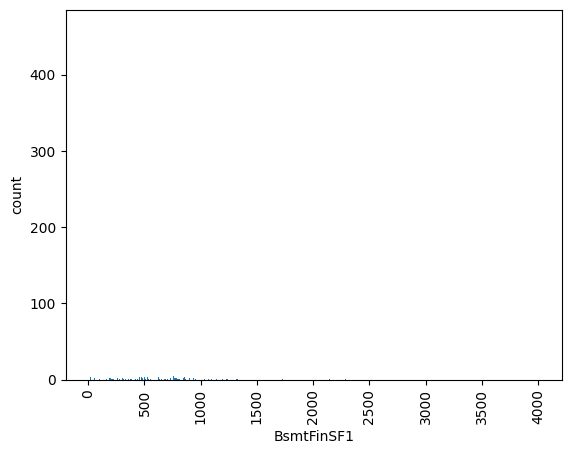

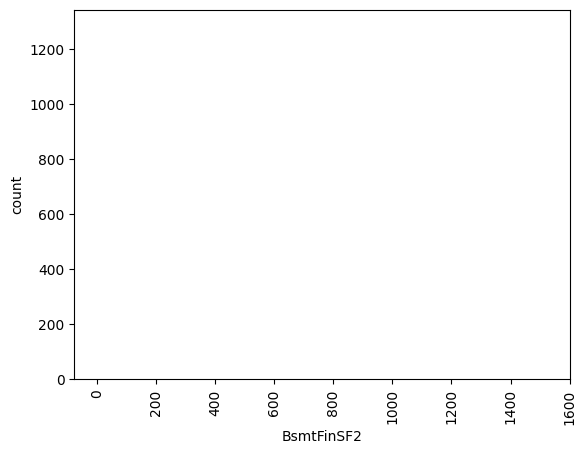

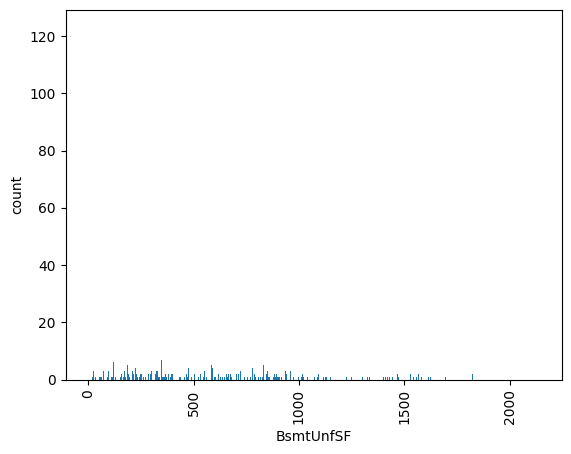

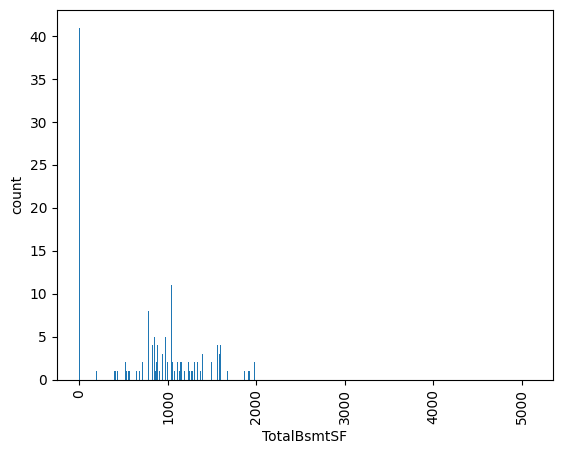

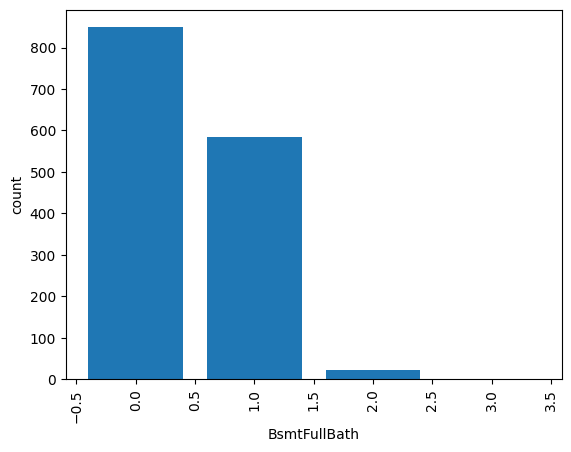

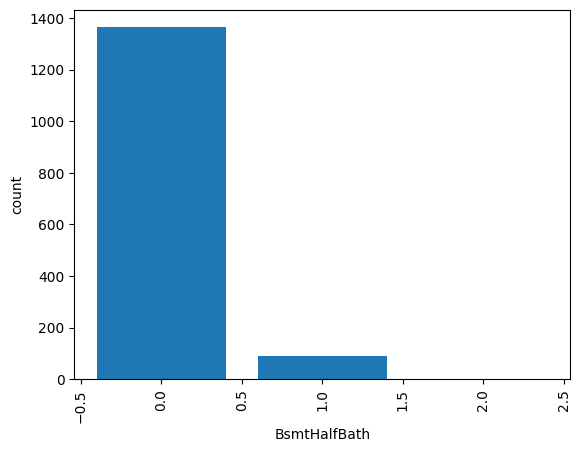

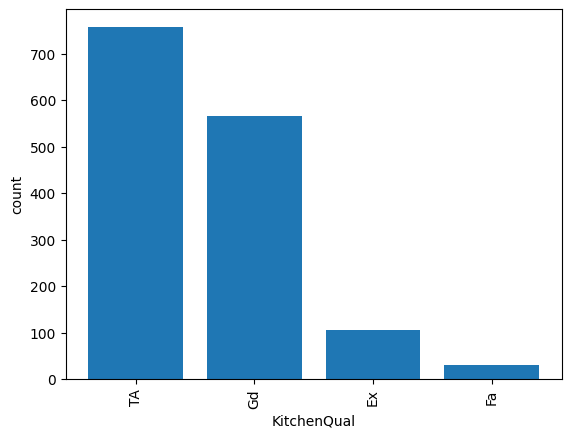

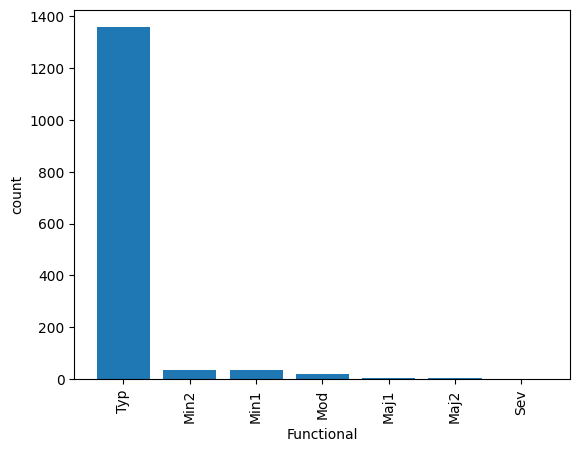

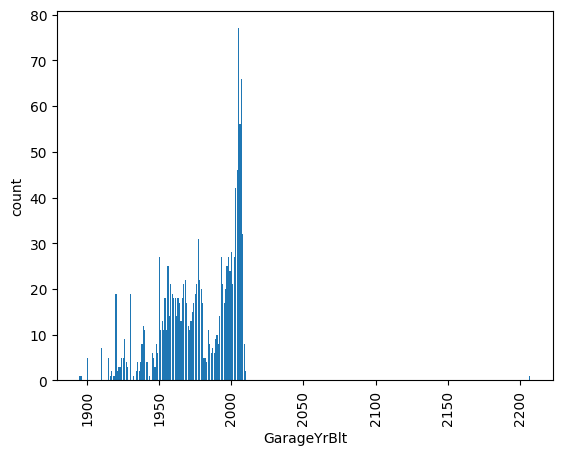

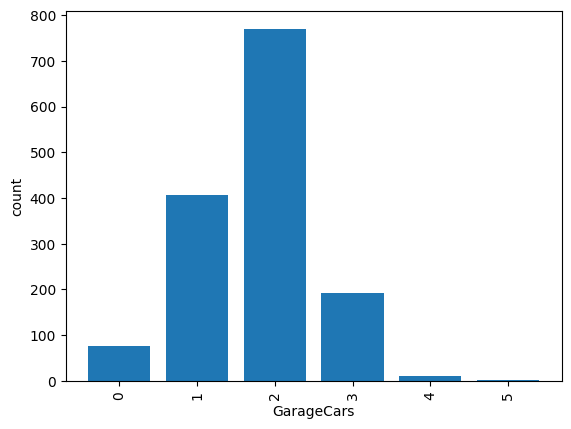

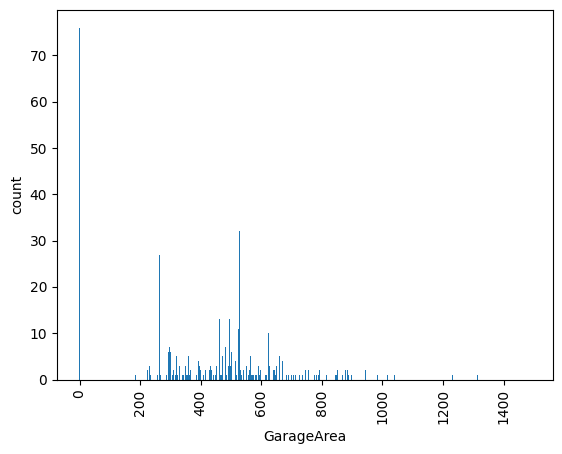

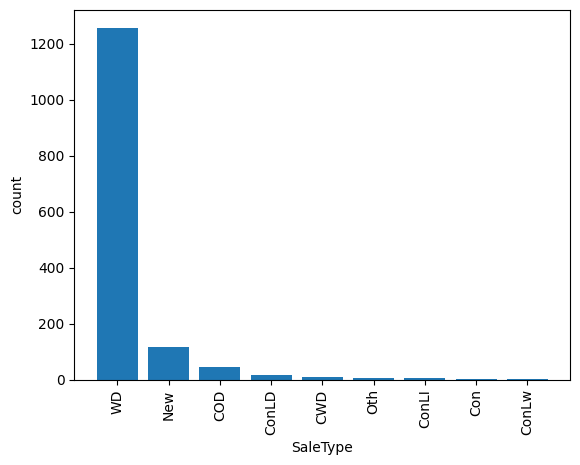

In [ ]:
# 欠損値のある列情報を可視化
for i in range(len(null_columns_1)):
  counts = df_test_1[null_columns_1[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(null_columns_1[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

### 欠損値の処理の整理

残り19列の欠損値を補完する方法について改めて整理する
欠損値に対するアプローチ
- 欠損値の除去
- 欠損値を予測値で補完
- 不完全データとして尤度を記述する

#### 欠損値の除去について
欠損データの除去は分析結果にバイアスをもたらすために優れた対策方法とは言えません。目安として、欠損の割合が10%未満であればリストワイズ法による欠損処理が有効とされますが、それ以上に欠損を含んだデータでは最尤法か多重代入法で対処するのが欠損データに対して一般的です。

また、データに外れ値が含まれる場合、それらを除外してからの代入が効果的とされます。代入には欠損していないデータを元に補完が行われるため、外れ値の影響を受けた偏った補完になってしまうためです。

参考：https://uribo.github.io/practical-ds/03/handling-missing-data.html

#### 欠測値の補完に係る主な方法等について
- （層化）平均値代入（Mean Imputation）
  * 各層内で、欠測値に対し、観測されている標本の平均値を代入する
  * ただ平均値代入による方法だと推定値には偏りが発生する
  * 適切な項目により標本を層化した上で代入を行うことにより、偏りを緩和することができる
  * 平均値の補完に伴い、標本分散については過小に評価される
  * 補助変数として利用する項目には、欠測している項目と関連を有し、欠測のし易さとも関連する項目を使うのがよい

- 回帰代入（Regression Imputation）
  * 当該回帰モデルにより推定した値（回帰直線上の理論値）を代入値とする
  * 欠測値に対しよい予測値を与える可能性があるが、そのためには適切なモデリングが必要となる
  * 説明変数に用いる変数には、連続値のほか、カテゴリカル変数などがある
  * 説明変数を一定の層への所属を表わすダミー変数とした場合には、層化平均値代入と同じものを表わす
  * 線形回帰モデルによる理論値の代入に伴い、標本分散については過小に評価される
  * 欠測値のばらつきを考慮して、予測値に誤差項（乱数）を加える方法は確率的回帰代入と呼ばれる

- 比率補完（Ratio Imputation）
  * 比率を算出する際に利用する項目としては、欠測が生じている項目に対して相関が高い項目を利用するのがよい
  * 比率の算出は、観測されている項目を利用して適切な層区分を設定し、それら層区分ごとに行う

- ホットデック法（Hot Deck Methods）
  * 欠測が生じている標本と欠測が生じていない標本について、共通して観測されている項目（補助変数）の値を基に一定の距離を計算し、最も距離の近い標本の観測値を欠測値に代入する
  * 回帰代入のようなモデルの仮定を要しないが、類似した標本を探し出すための作業が必要となる
  * 用いる距離としては、標本に関する補助変数のベクトルに関するユークリッド距離や、マハラノビス距離などがある
  * 標本のすべてについて傾向スコア（注）を推定し、傾向スコアを距離としてその値が最も近い（差の絶対値が最小となる）標本の観測値を代入値とする方法もある
  * 距離に基づく以外の方法としては、観測されている項目に基づきすべての標本をセルに分類し、欠測のある標本と同じセル内に存在する欠測のない標本からランダムに選んで、その観測値を代入値とする方法などがある
  * ドナーを同一のデータセットではなく、過去の調査結果など別のデータセットから探す場合はコールドデックと呼ばれる

- ＬＯＣＦ（Last Observation Carried Forward）
  * 欠測が発生している標本について、直近の観測値を欠測値に代入する
  * 経時による調整としては、欠測が生じている項目について、直近の観測値からの伸び率を欠測のない標本を用いて算出し、欠測が発生している標本の直近の観測値に乗じた値を代入値とする
  * 欠測が発生した以降、当該項目の値は変化しないとみなすものであるが、補完の対象とする項目によっては長期に固定して用いた場合、妥当な推計とならない可能性がある

- 演繹的補完（Deductive Imputation）
  * 欠測が生じている標本において、観測されている項目間の関係から、欠測している項目の値を論理的に定めることができる場合、その値により補完する
  * 補完に際して、一番初めに取り組むべき方法と考えられる


参考：https://www.soumu.go.jp/main_content/000741247.pdf

それぞれの欠損値の数を洗い出す

In [ ]:
# どの列にどのくらい欠損値が含まれるか確認
has_null = df_test_1.isnull().sum().to_dict()
for key,value in list(has_null.items()):
  if value == 0:
    has_null.pop(key, None)
has_null

{'MSZoning': 4,
 'LotFrontage': 227,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 894,
 'MasVnrArea': 15,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'GarageYrBlt': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'SaleType': 1}

全体の5%を超える例外['LotFrontage','MasVnrType', 'GarageYrBlt']以外は数値の場合は平均値を、カテゴリカルデータの場合は最頻値を代入する。

また、'MasVnrType'に関して、カテゴリカルデータで最頻値とその他の値の数が大きく差があるので、最頻値を代入して問題ないと判断して、同様に最頻値を代入する。

In [ ]:
# 例外の定義
exeption_col = ['LotFrontage', 'GarageYrBlt']
# カテゴリカルデータと数値を分ける
df_test_2 = df_test_1.copy()

df_test_obj = df_test_2[null_columns_1].select_dtypes(include="object")
df_test_flo = df_test_2[null_columns_1].select_dtypes(exclude="object")

# カテゴリカルデータ：例外を除く欠損値に最頻値を代入する
for col_name in df_test_obj.columns:
  if col_name in exeption_col:
    continue
  else:
    df_test_2[col_name].fillna(df_test_2[col_name].mode()[0], inplace=True)


# 数値：例外を除く欠損値に最頻値代入する
for col_name in df_test_flo.columns:
  if col_name in exeption_col:
    continue
  else:
    df_test_2[col_name].fillna(df_test_2[col_name].mean(numeric_only=True), inplace=True)

df_test_2

<ipython-input-22-7a520c860491>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_2[col_name].fillna(df_test_2[col_name].mode()[0], inplace=True)
<ipython-input-22-7a520c860491>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# 欠損値のある列情報を抽出
null_columns_2 = df_test_2.columns[df_test_2.isnull().any()]
print(f"欠損値のある列の数：{len(null_columns_2)}")
null_columns_2

欠損値のある列の数：2


Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

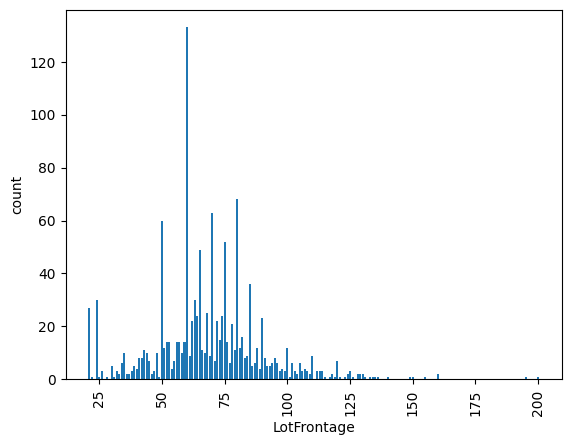

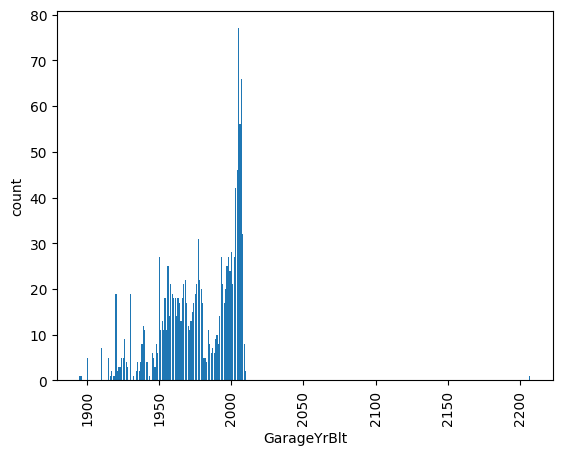

In [ ]:
# 欠損値のある列情報を可視化
for i in range(len(null_columns_2)):
  counts = df_test_1[null_columns_2[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(null_columns_2[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

<Axes: >

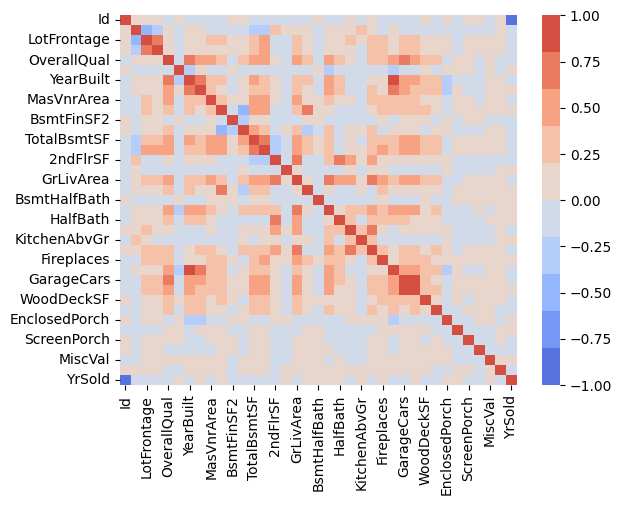

In [ ]:
import seaborn as sns

# 相関係数でヒートマップを作ってみる
cor = df_test_2.select_dtypes(exclude="object").corr()
sns.heatmap(cor, cmap=sns.color_palette('coolwarm', 10), vmin=-1, vmax=1)

相関もわかりずらいので、今回は多変量補完による欠損値の補完を行ってみる

多変量補完について
- IterativeImputer関数：各特徴を他のすべての特徴から推定する多変量入力装置。欠損値を持つ各特徴を他の特徴の関数としてラウンドロビン方式でモデル化することにより、欠損値を補完する戦略。
  - デフォルト=BayesianRidge()
  - RandomForestRegressor()
  - 実験的関数のため注意

- KNNImputer関数：最も近いサンプルを使用して欠落している特徴を推定する多変量補完装置。

参考：https://qiita.com/FukuharaYohei/items/9830d5760595619352a5

In [ ]:
from sklearn.impute import KNNImputer
df_test_3 = df_test_2.copy()

df_test_3[exeption_col] = KNNImputer(n_neighbors=5).fit_transform(df_test_3[exeption_col])
df_test_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
# 欠損値のある列情報を抽出
null_columns_3 = df_test_3.columns[df_test_3.isnull().any()]
print(f"欠損値のある列の数：{len(null_columns_3)}")
null_columns_3

欠損値のある列の数：0


Index([], dtype='object')

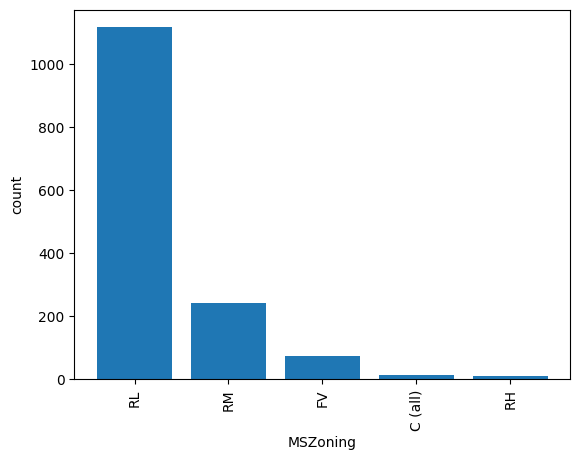

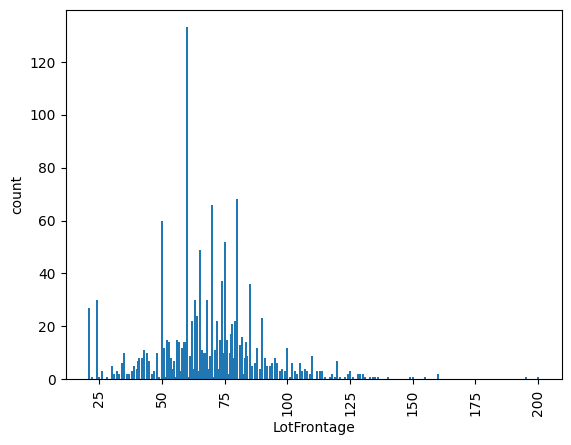

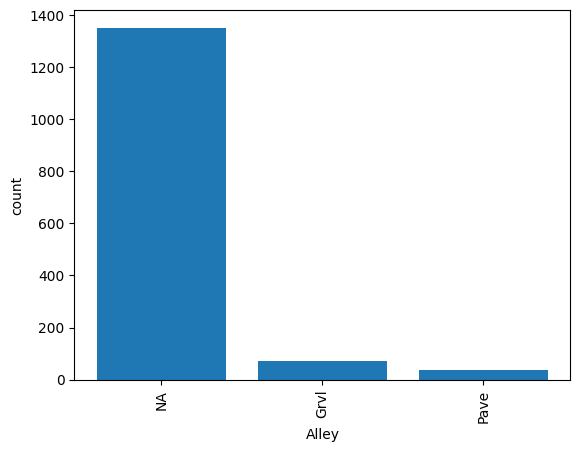

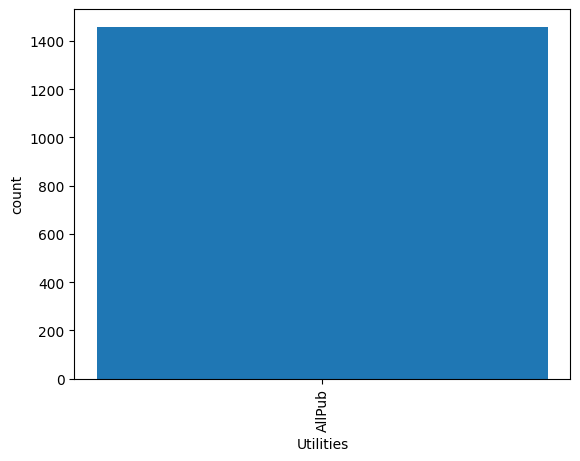

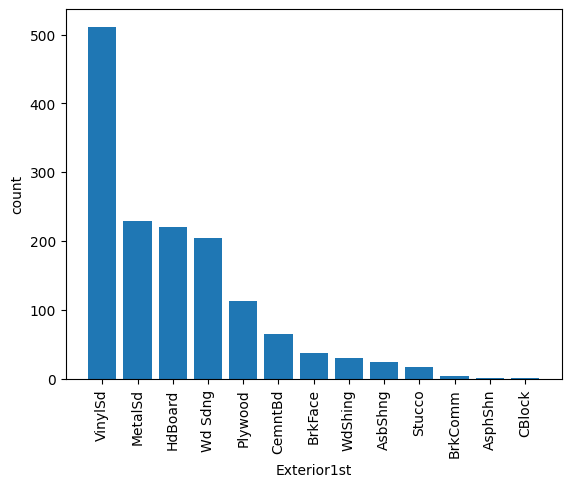

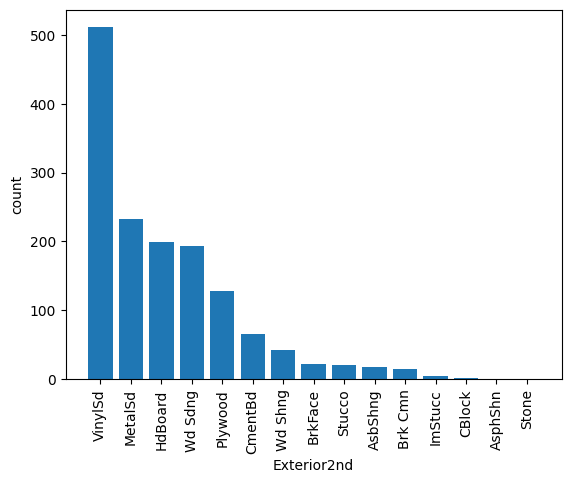

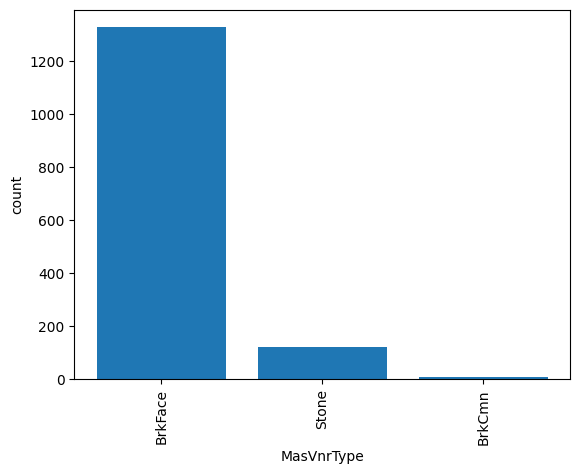

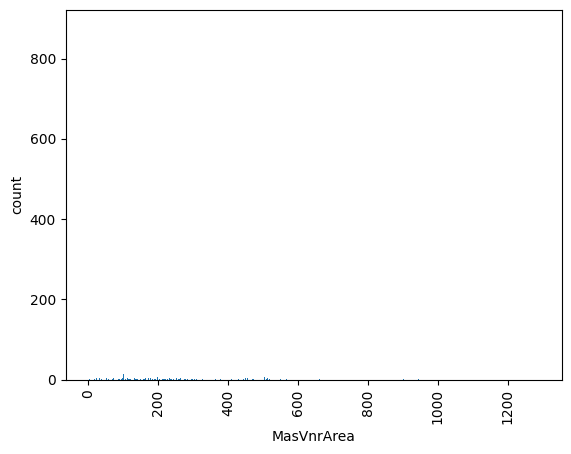

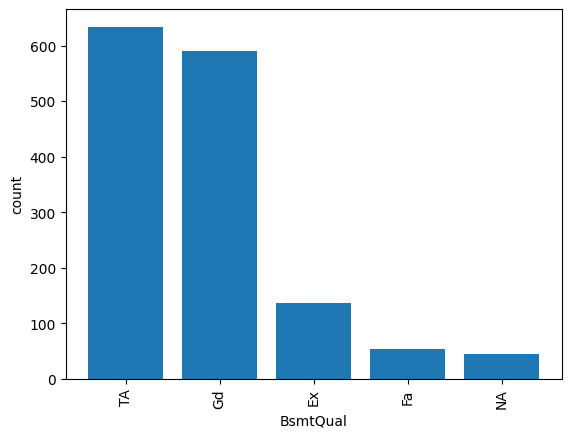

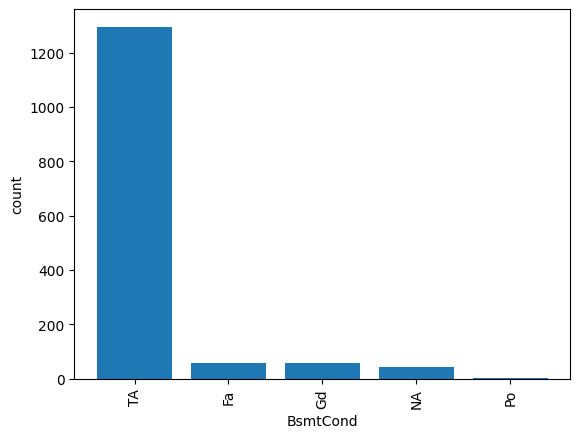

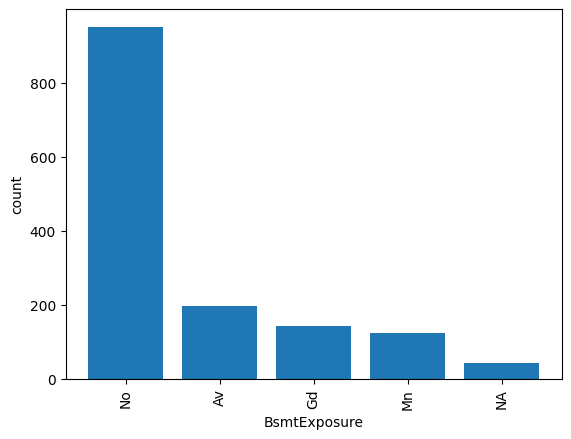

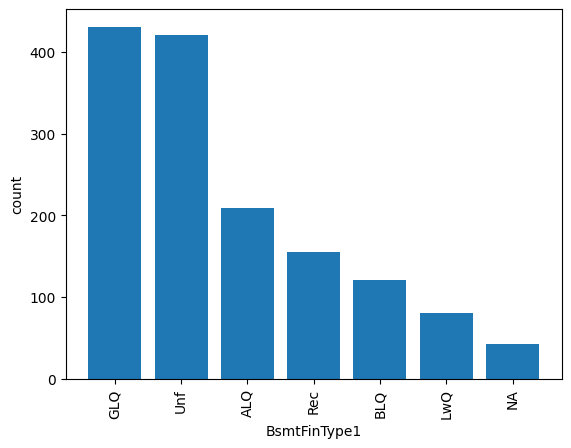

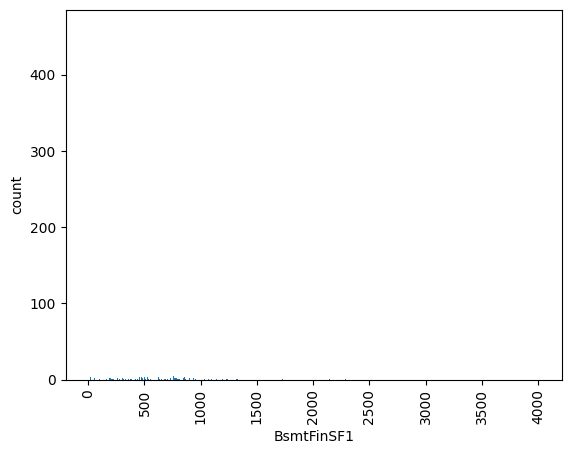

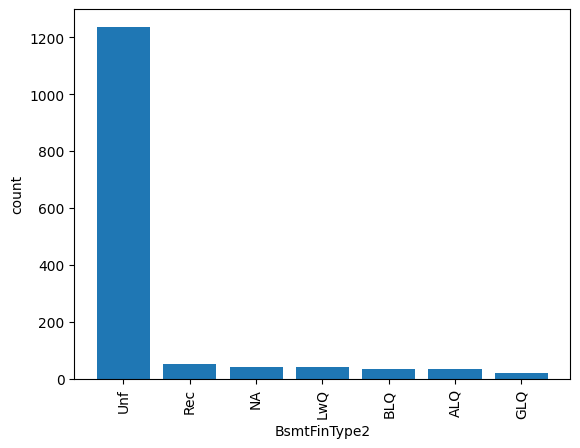

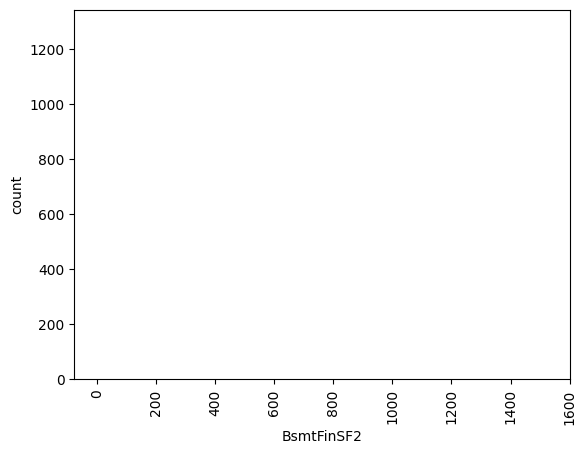

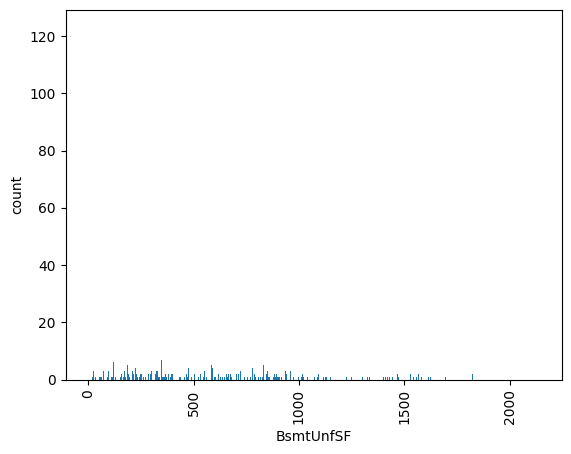

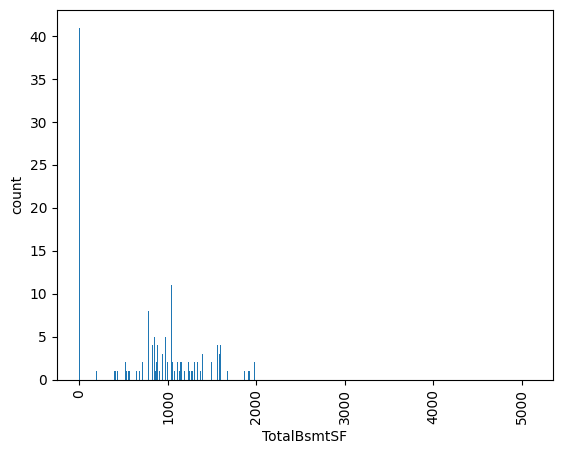

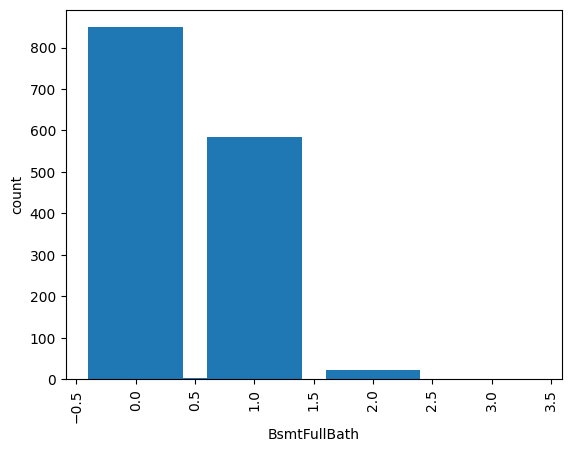

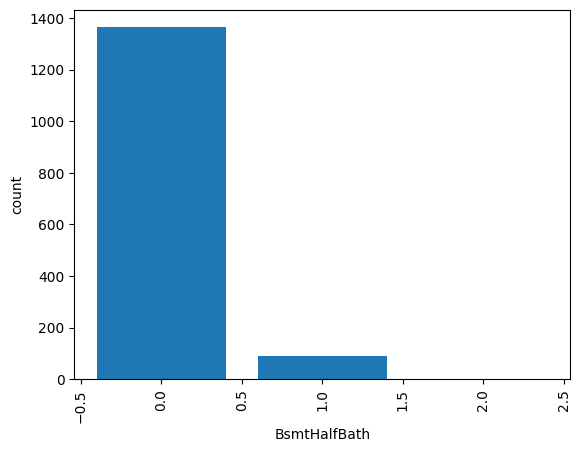

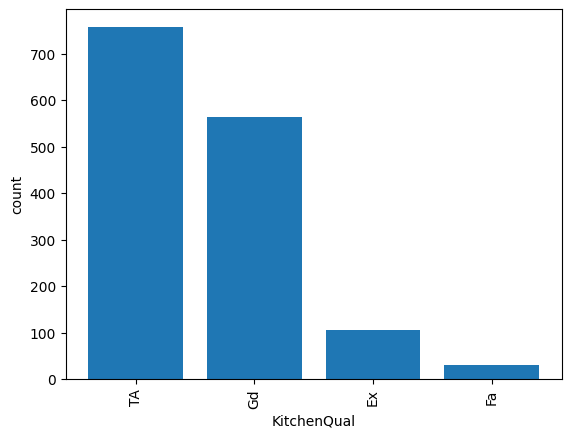

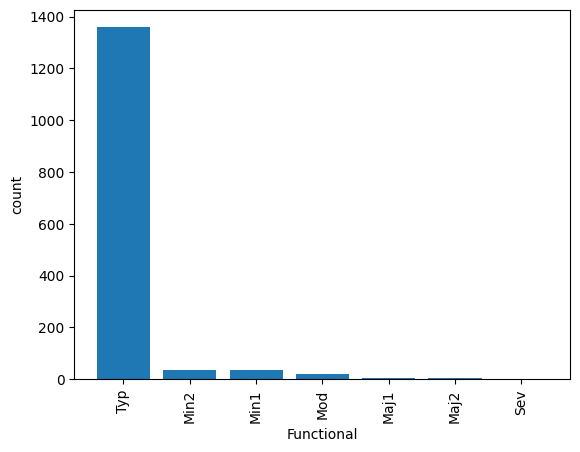

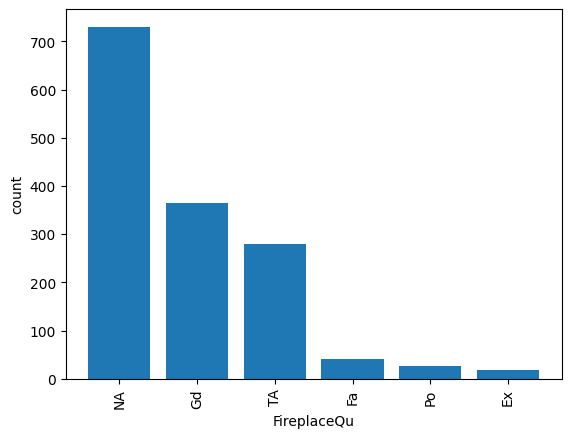

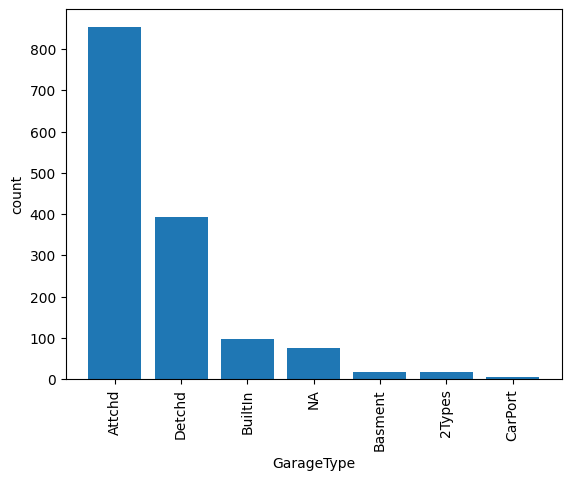

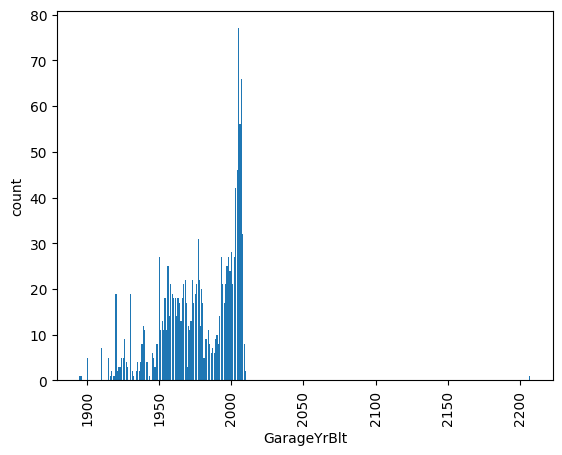

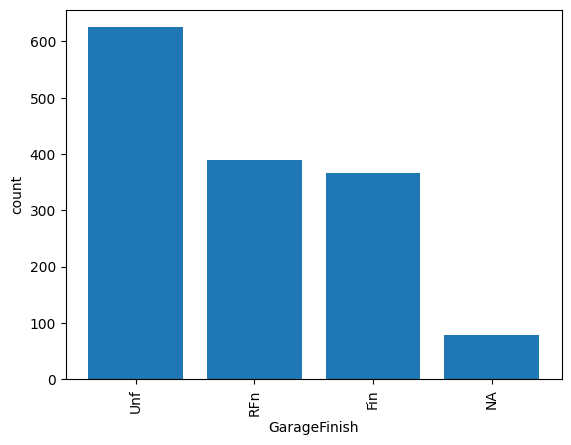

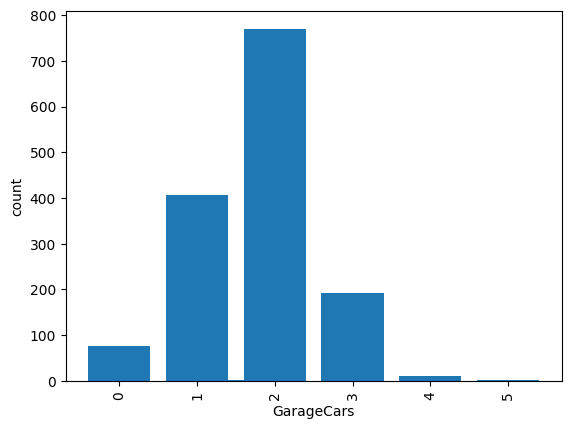

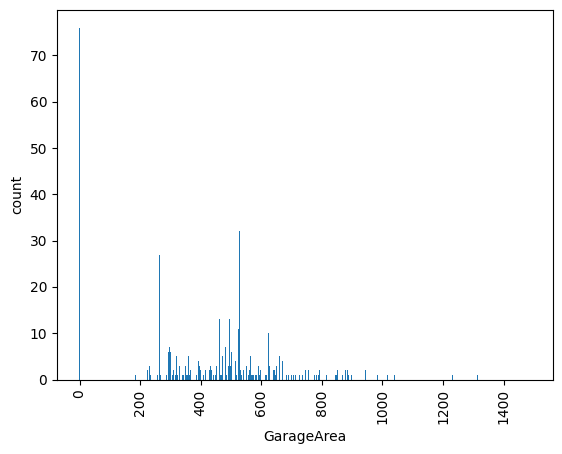

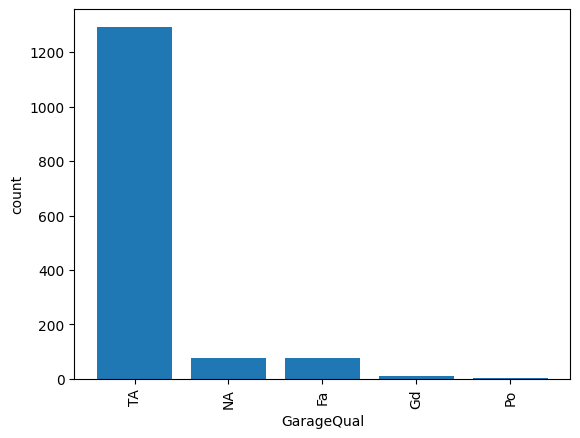

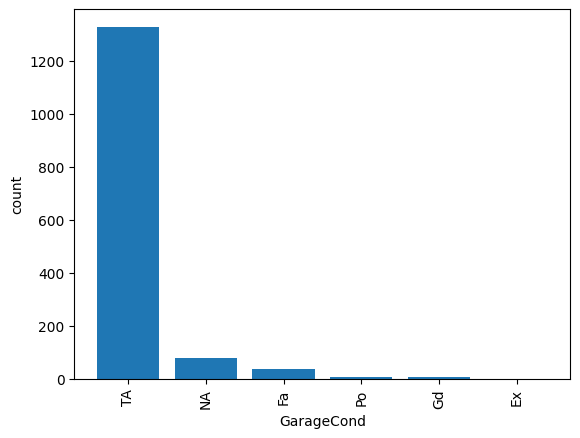

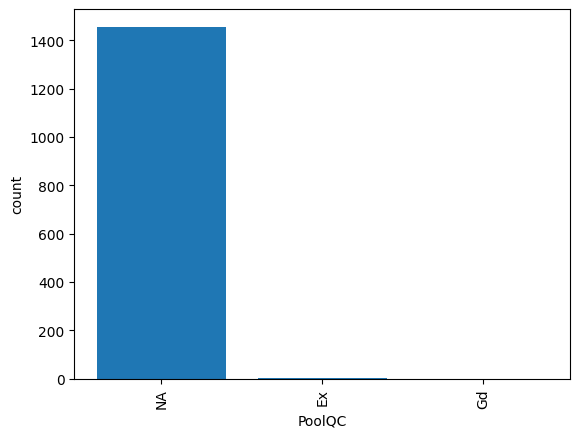

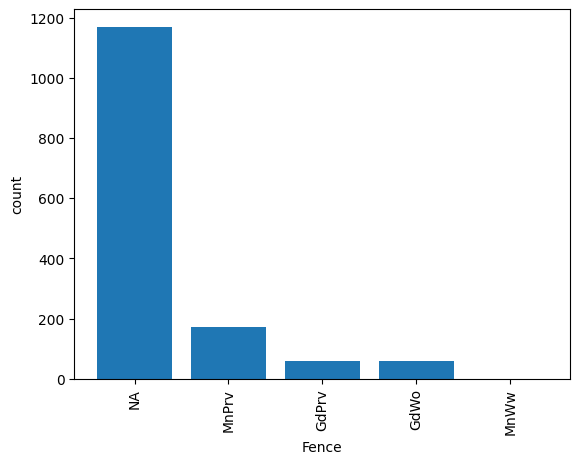

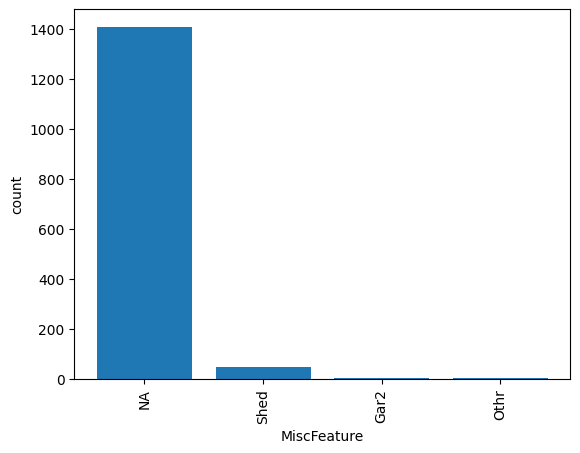

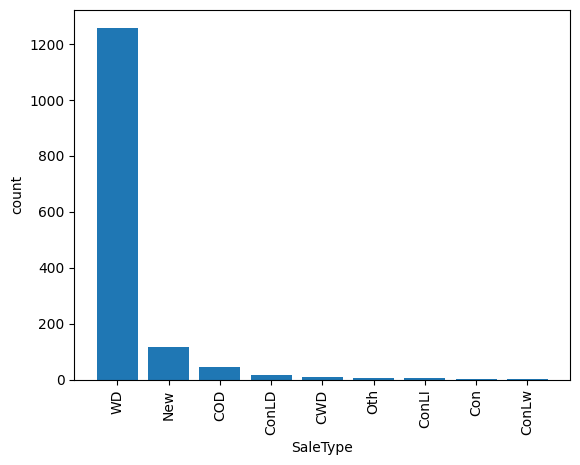

In [ ]:
# 欠損値のあった列の可視化
for i in range(len(null_columns)):
  counts = df_test_3[null_columns[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(null_columns[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

## 訓練データの前処理

テストデータと同様に前処理を行っていく

In [ ]:
# 欠損値のある列情報を抽出
null_train = df_train.columns[df_train.isnull().any()]
print(f"欠損値のある列の数：{len(null_train)}")
null_train

欠損値のある列の数：19


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

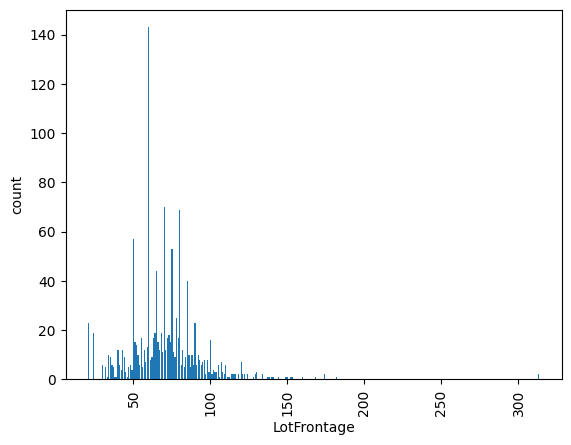

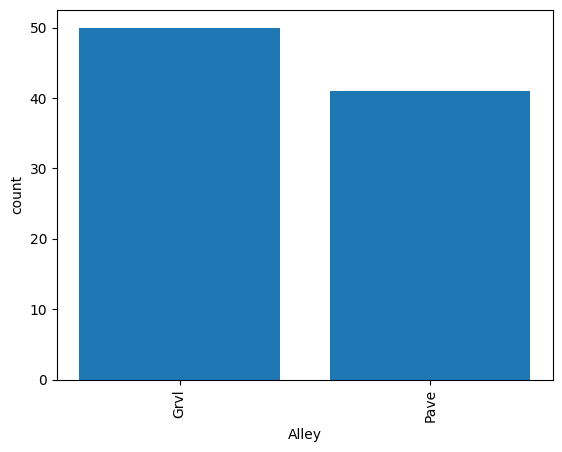

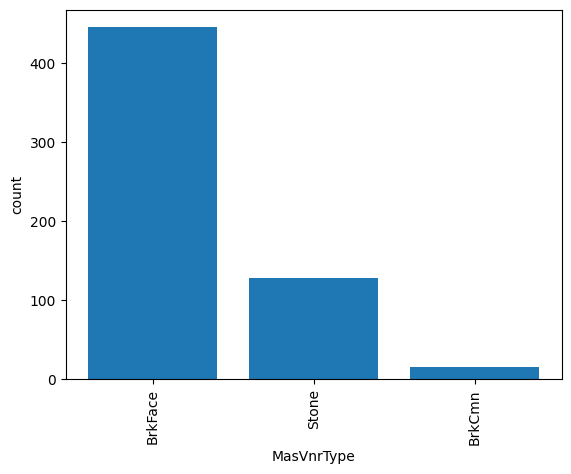

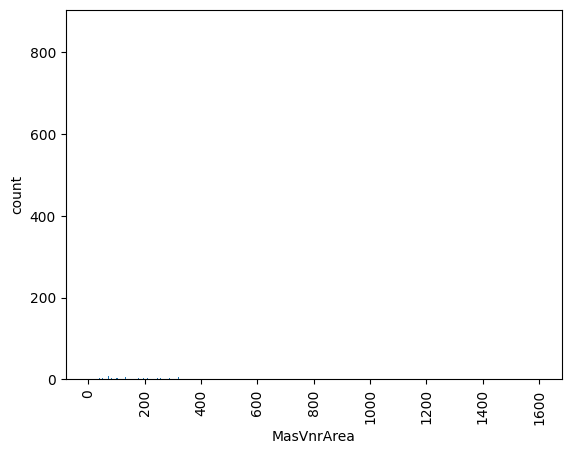

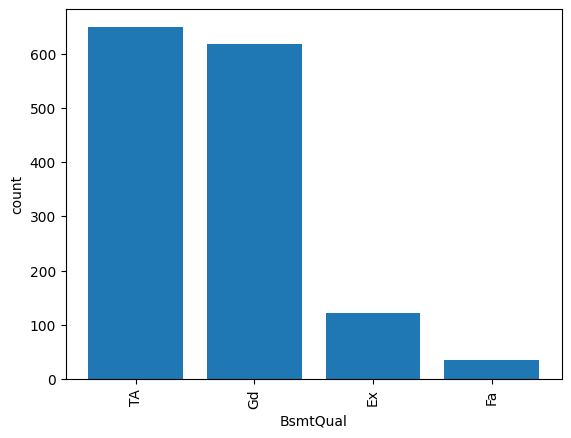

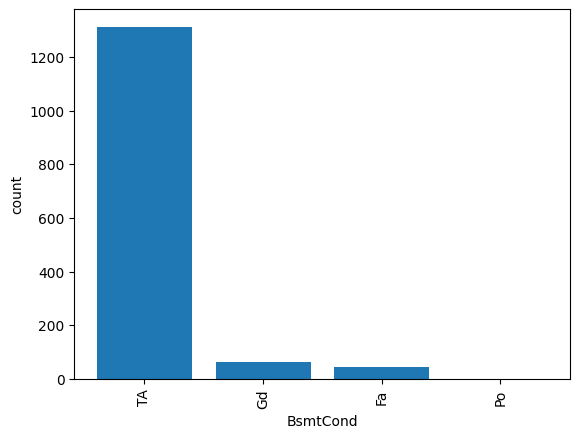

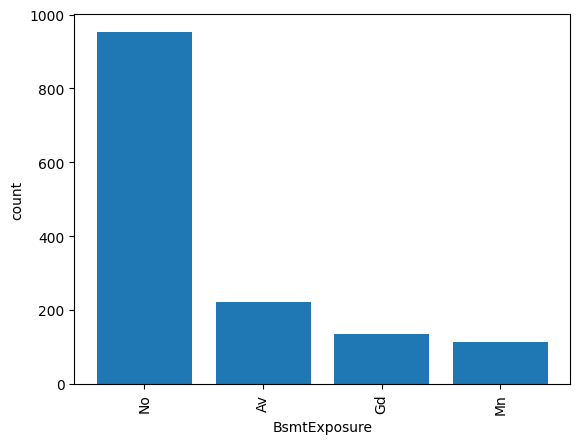

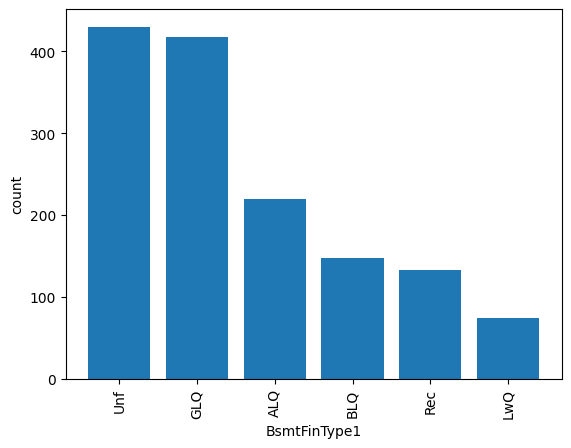

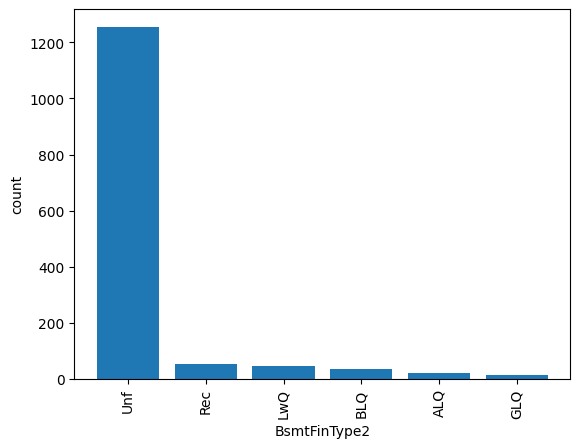

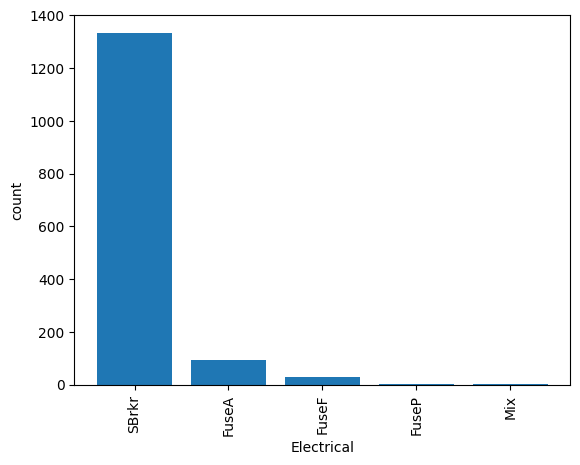

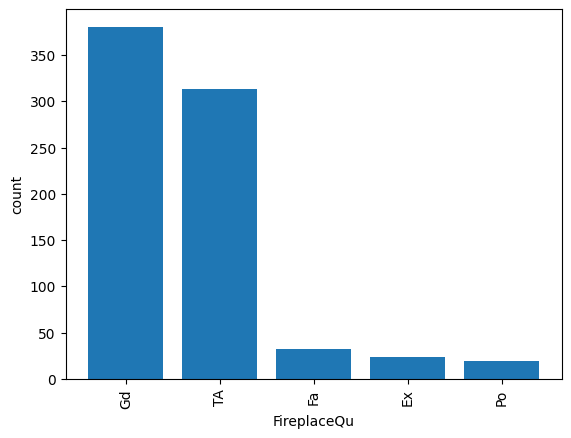

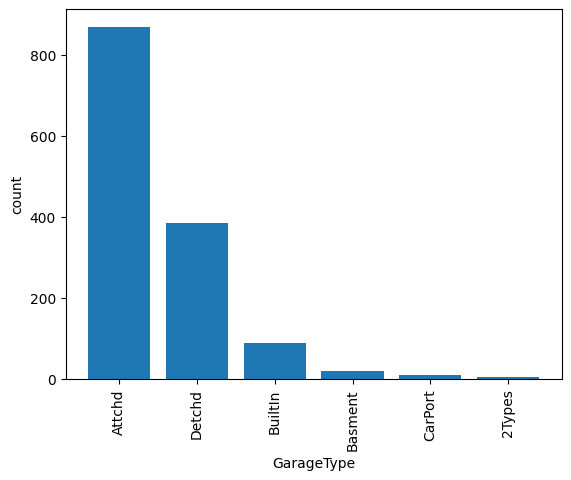

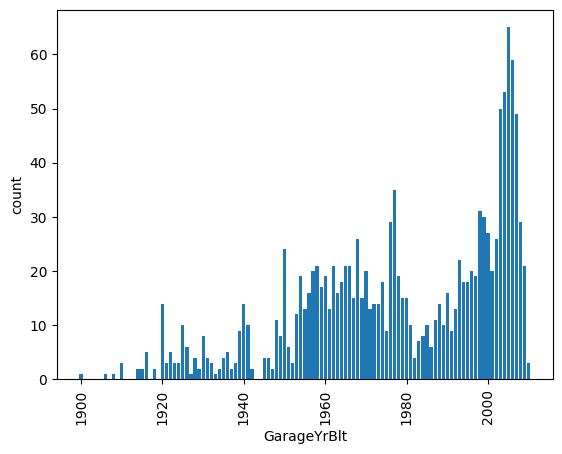

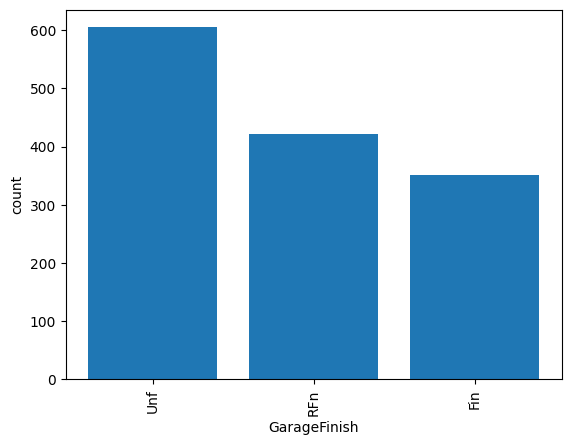

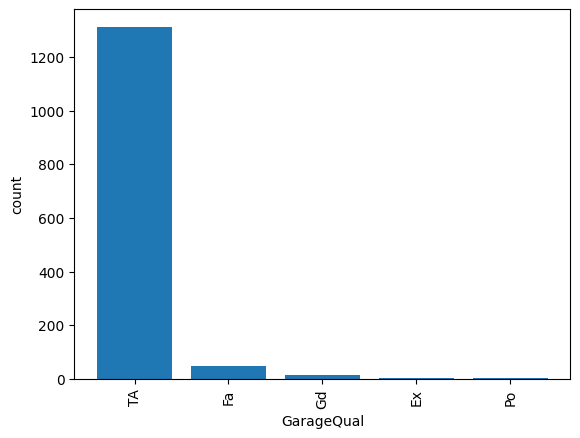

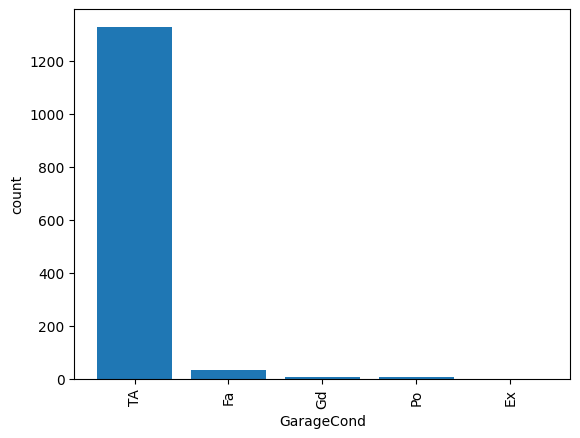

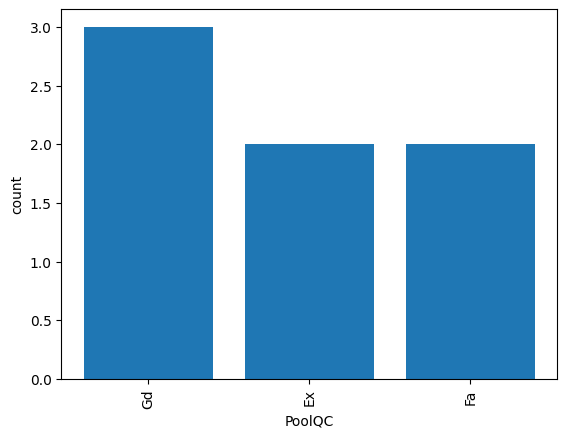

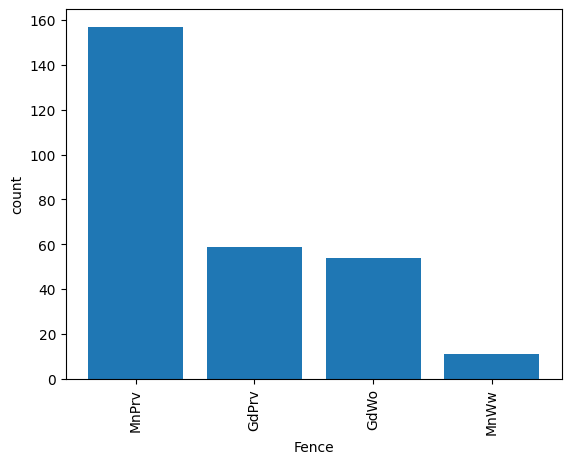

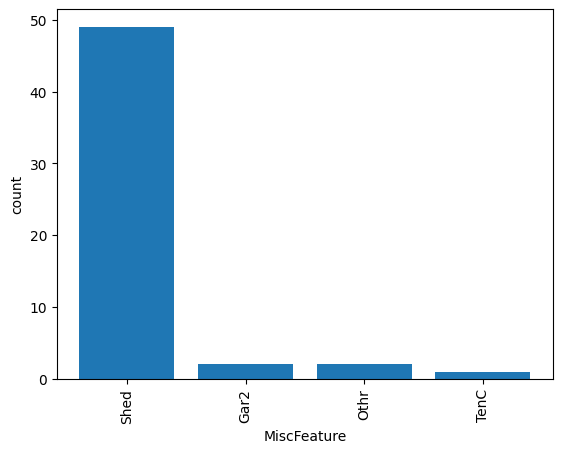

In [ ]:
# 欠損値のある列情報を可視化
for i in range(len(null_train)):
  counts = df_train[null_train[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(null_train[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

In [ ]:
# NULLが意味を持つ列名のリスト
print(f"NULLが意味を持つ列数：{len(mean_null)}")
mean_null

NULLが意味を持つ列数：14


['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
# 上記に該当する列の欠損値をNAに変更
df_train_1 = df_train.copy()
df_train_1[mean_null] = df_test[mean_null].fillna("NA")
df_train_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,Gar2,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [ ]:
# どの列にどのくらい欠損値が含まれるか確認
has_null_train = df_train_1.isnull().sum().to_dict()

# 例外の定義
exeption_col_train = []

for key,value in list(has_null_train.items()):
  if value == 0:
    has_null_train.pop(key, None)
  elif value >= int(df_train_1.shape[0])*0.05:
    exeption_col_train.append(key)
has_null_train

{'LotFrontage': 259,
 'Alley': 1,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 1,
 'BsmtCond': 1,
 'BsmtExposure': 1,
 'BsmtFinType1': 1,
 'BsmtFinType2': 1,
 'Electrical': 1,
 'FireplaceQu': 1,
 'GarageType': 1,
 'GarageYrBlt': 81,
 'GarageFinish': 1,
 'GarageQual': 1,
 'GarageCond': 1,
 'PoolQC': 1,
 'Fence': 1,
 'MiscFeature': 1}

In [ ]:
# カテゴリカルデータと数値を分ける
df_train_2 = df_train_1.copy()

df_train_obj = df_train_2[null_train].select_dtypes(include="object")
df_train_flo = df_train_2[null_train].select_dtypes(exclude="object")

# カテゴリカルデータ：例外を除く欠損値に最頻値を代入する
for col_name in df_train_obj.columns:
  if col_name in exeption_col_train:
    continue
  else:
    df_train_2[col_name].fillna(df_train_2[col_name].mode()[0], inplace=True)


# 数値：例外を除く欠損値に最頻値代入する
for col_name in df_train_flo.columns:
  if col_name in exeption_col_train:
    continue
  else:
    df_train_2[col_name].fillna(df_train_2[col_name].mean(numeric_only=True), inplace=True)

df_train_2

<ipython-input-36-d36768eaac40>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2[col_name].fillna(df_train_2[col_name].mode()[0], inplace=True)
<ipython-input-36-d36768eaac40>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,Gar2,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [ ]:
# 欠損値のある列情報を抽出
null_train_2 = df_train_2.columns[df_train_2.isnull().any()]
print(f"欠損値のある列の数：{len(null_train_2)}")
null_train_2

欠損値のある列の数：3


Index(['LotFrontage', 'MasVnrType', 'GarageYrBlt'], dtype='object')

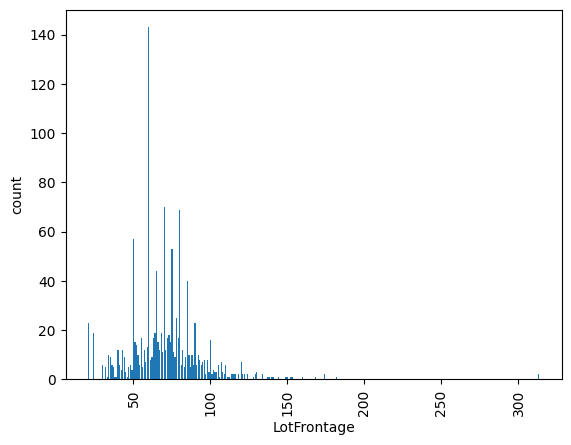

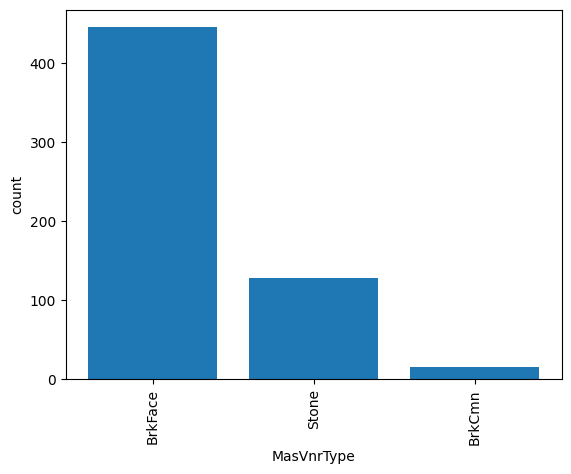

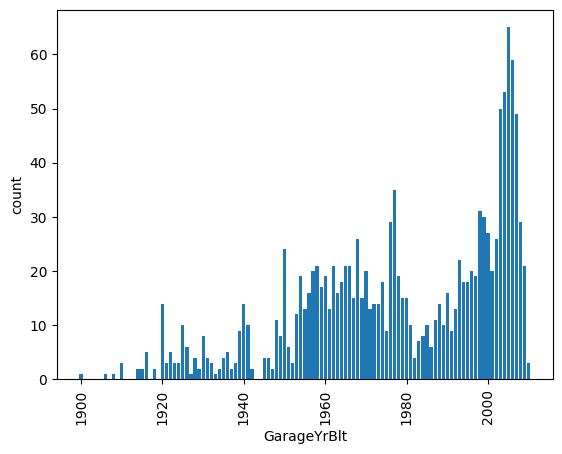

In [ ]:
# 欠損値のある列情報を可視化
for i in range(len(null_train_2)):
  counts = df_train_2[null_train_2[i]].value_counts()

  # 棒グラフを作成する
  plt.bar(counts.index, counts.values)

  # 軸ラベルを設定する
  plt.xlabel(null_train_2[i])
  plt.ylabel('count')

  # x軸の目盛りラベルを90度回転させる
  plt.xticks(rotation=90)

  plt.show()

'MasVnrType'に関しては欠損値が多すぎるため、最終的に削除する方向ですすめる。

その他の変数に関してはテストデータと同様にKNNImputer関数で補完する。

In [ ]:
# K近傍補完
df_train_3 = df_train_2.copy()
if "MasVnrType" in exeption_col_train:
  exeption_col_train.remove("MasVnrType")

df_train_3[exeption_col_train] = KNNImputer(n_neighbors=5).fit_transform(df_train_3[exeption_col_train])
df_train_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,Gar2,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [ ]:
# 欠損値のある列情報を抽出
null_train_3 = df_train_3.columns[df_train_3.isnull().any()]
print(f"欠損値のある列の数：{len(null_train_3)}")
null_train_3

欠損値のある列の数：1


Index(['MasVnrType'], dtype='object')

'MasVnrType'は削除するため問題なし。

## エンコーディング

- Labelエンコーディング: 順序がなく、カテゴリの数が少ない場合に適用します。例えば、動物の種類や色など。
- Ordinalエンコーディング: 順序が重要な場合に適用します。例えば、教育レベルや評価など。
- One-Hotエンコーディング: 順序がなく、カテゴリの数が多い場合や特徴量の独立性が重要な場合に適用します。例えば、色や製品カテゴリなど。

使用例）from sklearn.preprocessing import LabelEncoder,OrdinalEncorder,OneHotEncoder

参考：https://www.salesanalytics.co.jp/datascience/datascience233/

In [ ]:
# ラベルエンコーディングの際、変換される数値にずれがないように一時的に結合させる
df_tmp = pd.concat([df_test_3, df_train_3])

# カテゴリカルデータの列を抽出
categ_col = df_tmp.select_dtypes(include="object").columns
print(f"カテゴリカルデータの列の数：{len(categ_col)}")
categ_col

カテゴリカルデータの列の数：43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# カテゴリカルデータの中身を確認
for col_name in categ_col:
  print(f"・{col_name} : {df_test_1[col_name].unique()}")

・MSZoning : ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
・Street : ['Pave' 'Grvl']
・Alley : ['NA' 'Pave' 'Grvl']
・LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
・LandContour : ['Lvl' 'HLS' 'Bnk' 'Low']
・Utilities : ['AllPub']
・LotConfig : ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
・LandSlope : ['Gtl' 'Mod' 'Sev']
・Neighborhood : ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
・Condition1 : ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
・Condition2 : ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
・BldgType : ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
・HouseStyle : ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
・RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
・RoofMatl : ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
・Exterior1st : ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' '

In [ ]:
from sklearn.preprocessing import LabelEncoder

# カテゴリカルデータのラベルエンコーディング
df_tmp_1 = df_tmp.copy()
dict_categ = {}
for col_name in categ_col:
  label_encoder = LabelEncoder()
  label_encoder.fit(sorted(df_tmp_1[col_name].dropna().unique()))
  df_tmp_1[col_name] = label_encoder.fit_transform(df_tmp_1[col_name])

  dict_categ[col_name] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
  print(f"{col_name}の辞書：", dict_categ[col_name])

df_tmp_1

MSZoningの辞書： {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
Streetの辞書： {'Grvl': 0, 'Pave': 1}
Alleyの辞書： {'Grvl': 0, 'NA': 1, 'Pave': 2}
LotShapeの辞書： {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
LandContourの辞書： {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
Utilitiesの辞書： {'AllPub': 0, 'NoSeWa': 1}
LotConfigの辞書： {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
LandSlopeの辞書： {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhoodの辞書： {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
Condition1の辞書： {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
Condition2の辞書： {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,2,80.0,11622,1,1,3,3,0,...,0,2,2,1,0,6,2010,8,4,NaN
1,1462,20,3,81.0,14267,1,1,0,3,0,...,0,2,4,0,12500,6,2010,8,4,NaN
2,1463,60,3,74.0,13830,1,1,0,3,0,...,0,2,2,1,0,3,2010,8,4,NaN
3,1464,60,3,78.0,9978,1,1,0,3,0,...,0,2,4,1,0,6,2010,8,4,NaN
4,1465,120,3,43.0,5005,1,1,0,1,0,...,0,2,4,1,0,1,2010,8,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,0,2,4,1,0,8,2007,8,4,175000.0
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,0,2,4,1,0,2,2010,8,4,210000.0
1457,1458,70,3,66.0,9042,1,1,3,3,0,...,0,2,2,3,2500,5,2010,8,4,266500.0
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,0,2,4,1,0,4,2010,8,4,142125.0


In [ ]:
df_tmp_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
df_tmp_1.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,3.027749,69.552131,10168.114080,0.995889,0.977390,1.947585,2.776978,0.000343,...,2.251799,1.996574,3.482700,1.062350,50.825968,6.213087,2007.792737,7.491264,3.779034,180921.195890
std,842.787043,42.517628,0.658355,21.891462,7886.996359,0.063996,0.269864,1.409721,0.704391,0.018509,...,35.663946,0.078466,1.099703,0.354474,567.402211,2.714762,1.314964,1.593502,1.078241,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,730.500000,20.000000,3.000000,60.000000,7478.000000,1.000000,1.000000,0.000000,3.000000,0.000000,...,0.000000,2.000000,4.000000,1.000000,0.000000,4.000000,2007.000000,8.000000,4.000000,129975.000000
50%,1460.000000,50.000000,3.000000,70.000000,9453.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,0.000000,2.000000,4.000000,1.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,2189.500000,70.000000,3.000000,80.000000,11570.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,0.000000,2.000000,4.000000,1.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,2919.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,...,800.000000,2.000000,4.000000,3.000000,17000.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


ここまででデータが全て数値化されて扱いやすくなった。

'Id'は名義変数、'MasVnrType'は欠損値が多いため、削除する。

In [ ]:
# 'Id'と'MasVnrType'を削除
df_tmp_2 = df_tmp_1.drop(['Id', 'MasVnrType'], axis=1)
df_tmp_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,2,80.0,11622,1,1,3,3,0,4,...,0,2,2,1,0,6,2010,8,4,NaN
1,20,3,81.0,14267,1,1,0,3,0,0,...,0,2,4,0,12500,6,2010,8,4,NaN
2,60,3,74.0,13830,1,1,0,3,0,4,...,0,2,2,1,0,3,2010,8,4,NaN
3,60,3,78.0,9978,1,1,0,3,0,4,...,0,2,4,1,0,6,2010,8,4,NaN
4,120,3,43.0,5005,1,1,0,1,0,4,...,0,2,4,1,0,1,2010,8,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,...,0,2,4,1,0,8,2007,8,4,175000.0
1456,20,3,85.0,13175,1,1,3,3,0,4,...,0,2,4,1,0,2,2010,8,4,210000.0
1457,70,3,66.0,9042,1,1,3,3,0,4,...,0,2,2,3,2500,5,2010,8,4,266500.0
1458,20,3,68.0,9717,1,1,3,3,0,4,...,0,2,4,1,0,4,2010,8,4,142125.0


In [ ]:
df_tmp_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   Alley          2919 non-null   int64  
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   int64  
 8   Utilities      2919 non-null   int64  
 9   LotConfig      2919 non-null   int64  
 10  LandSlope      2919 non-null   int64  
 11  Neighborhood   2919 non-null   int64  
 12  Condition1     2919 non-null   int64  
 13  Condition2     2919 non-null   int64  
 14  BldgType       2919 non-null   int64  
 15  HouseStyle     2919 non-null   int64  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

目的変数である'SalePrice'以外は欠損値がなく、全て数値になっていることがわかる

In [ ]:
df_tmp_2.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,3.027749,69.552131,10168.114080,0.995889,0.977390,1.947585,2.776978,0.000343,3.055841,...,2.251799,1.996574,3.482700,1.062350,50.825968,6.213087,2007.792737,7.491264,3.779034,180921.195890
std,42.517628,0.658355,21.891462,7886.996359,0.063996,0.269864,1.409721,0.704391,0.018509,1.604472,...,35.663946,0.078466,1.099703,0.354474,567.402211,2.714762,1.314964,1.593502,1.078241,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7478.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,2.000000,4.000000,1.000000,0.000000,4.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,70.000000,9453.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,2.000000,4.000000,1.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,80.000000,11570.000000,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,2.000000,4.000000,1.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,800.000000,2.000000,4.000000,3.000000,17000.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


データのばらつきが大きいため、標準化を行う

In [ ]:
from sklearn.preprocessing import StandardScaler

# 目的変数と説明変数を分割する
X = df_tmp_2.drop('SalePrice', axis=1)
y = df_tmp_2['SalePrice']

# 標準化を行う
scaler = StandardScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X))
X_scaler

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-0.873616,-1.561354,0.477339,0.184371,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,1.850256,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
1,-0.873616,-0.042157,0.523027,0.519791,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.285935,-0.06315,0.043668,0.470481,-2.997488,21.944410,-0.078505,1.678860,0.319311,0.204967
2,0.067331,-0.042157,0.203213,0.464374,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.183764,1.678860,0.319311,0.204967
3,0.067331,-0.042157,0.385964,-0.024109,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
4,1.478753,-0.042157,-1.213107,-0.654748,0.064249,0.083799,-1.381776,-2.523149,-0.018512,0.588555,...,2.277494,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.920603,1.678860,0.319311,0.204967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.067331,-0.042157,-0.345040,-0.285470,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,0.658334,-0.602962,0.319311,0.204967
2915,-0.873616,-0.042157,0.705778,0.381311,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,1.678860,0.319311,0.204967
2916,0.302568,-0.042157,-0.162289,-0.142806,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,5.467202,4.317209,-0.446925,1.678860,0.319311,0.204967
2917,-0.873616,-0.042157,-0.070913,-0.057207,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,1.678860,0.319311,0.204967


In [ ]:
y

,SalePrice
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [ ]:
# 分離を行う
X_test_after = X_scaler.iloc[:len(df_test_3), :]
X_train_after = X_scaler.iloc[len(df_test_3):, :]

y_test_after = y.iloc[:len(df_test_3)]
y_train_after = y.iloc[len(df_test_3):]

In [ ]:
X_test_after.shape

(1459, 78)

In [ ]:
X_train_after.shape

(1460, 78)

In [ ]:
y_test_after.shape

(1459,)

In [ ]:
y_train_after.shape

(1460,)

In [ ]:
display(X_test_after)
display(y_test_after)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-0.873616,-1.561354,0.477339,0.184371,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,1.850256,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
1,-0.873616,-0.042157,0.523027,0.519791,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.285935,-0.06315,0.043668,0.470481,-2.997488,21.944410,-0.078505,1.678860,0.319311,0.204967
2,0.067331,-0.042157,0.203213,0.464374,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.183764,1.678860,0.319311,0.204967
3,0.067331,-0.042157,0.385964,-0.024109,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
4,1.478753,-0.042157,-1.213107,-0.654748,0.064249,0.083799,-1.381776,-2.523149,-0.018512,0.588555,...,2.277494,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.920603,1.678860,0.319311,0.204967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419700,1.477041,-2.218237,-1.043937,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,-1.363569,0.319311,0.204967
1455,2.419700,1.477041,-2.218237,-1.049263,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,-1.363569,0.319311,-3.505415
1456,-0.873616,-0.042157,4.132358,1.246808,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,1.026753,-1.363569,0.319311,-3.505415
1457,0.655424,-0.042157,-0.345040,0.034605,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,5.467202,1.144312,0.289914,-1.363569,0.319311,0.204967


,SalePrice
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


In [ ]:
# データを元に戻す
df_test_after = pd.concat([X_test_after, y_test_after], axis=1)

# 列名を設定
df_test_after.columns = df_tmp_2.columns
df_test_after = df_test_after.drop('SalePrice', axis=1)
df_test_after

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.873616,-1.561354,0.477339,0.184371,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,1.850256,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
1,-0.873616,-0.042157,0.523027,0.519791,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.285935,-0.06315,0.043668,0.470481,-2.997488,21.944410,-0.078505,1.678860,0.319311,0.204967
2,0.067331,-0.042157,0.203213,0.464374,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.183764,1.678860,0.319311,0.204967
3,0.067331,-0.042157,0.385964,-0.024109,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
4,1.478753,-0.042157,-1.213107,-0.654748,0.064249,0.083799,-1.381776,-2.523149,-0.018512,0.588555,...,2.277494,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.920603,1.678860,0.319311,0.204967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419700,1.477041,-2.218237,-1.043937,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,-1.363569,0.319311,0.204967
1455,2.419700,1.477041,-2.218237,-1.049263,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,-1.363569,0.319311,-3.505415
1456,-0.873616,-0.042157,4.132358,1.246808,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,1.026753,-1.363569,0.319311,-3.505415
1457,0.655424,-0.042157,-0.345040,0.034605,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,5.467202,1.144312,0.289914,-1.363569,0.319311,0.204967


In [ ]:
display(X_train_after)
display(y_train_after)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
1459,0.067331,-0.042157,-0.207977,-0.217879,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.552184,0.157646,0.319311,0.204967
1460,-0.873616,-0.042157,0.477339,-0.072044,0.064249,0.083799,0.746669,0.316671,-0.018512,-0.658174,...,-0.285935,-0.06315,0.043668,0.470481,-2.997488,-0.089592,-0.446925,-0.602962,0.319311,0.204967
1461,0.067331,-0.042157,-0.070913,0.137197,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,1.026753,0.157646,0.319311,0.204967
1462,0.302568,-0.042157,-0.436415,-0.078385,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,-1.363569,0.319311,-3.505415
1463,0.067331,-0.042157,0.660090,0.518903,0.064249,0.083799,-1.381776,0.316671,-0.018512,-0.658174,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,2.132012,0.157646,0.319311,0.204967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.067331,-0.042157,-0.345040,-0.285470,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,0.658334,-0.602962,0.319311,0.204967
2915,-0.873616,-0.042157,0.705778,0.381311,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,1.678860,0.319311,0.204967
2916,0.302568,-0.042157,-0.162289,-0.142806,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,5.467202,4.317209,-0.446925,1.678860,0.319311,0.204967
2917,-0.873616,-0.042157,-0.070913,-0.057207,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,1.678860,0.319311,0.204967


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


インデックスが変わっているのでそれをリセットして結合する

In [ ]:
# インデックスをリセットする
X_train_after.reset_index(drop=True, inplace=True)

# データを元に戻す
df_train_after = pd.concat([X_train_after, y_train_after], axis=1)

# 列名を設定
df_train_after.columns = df_tmp_2.columns
df_train_after

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.067331,-0.042157,-0.207977,-0.217879,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.552184,0.157646,0.319311,0.204967,208500.0
1,-0.873616,-0.042157,0.477339,-0.072044,0.064249,0.083799,0.746669,0.316671,-0.018512,-0.658174,...,-0.06315,0.043668,0.470481,-2.997488,-0.089592,-0.446925,-0.602962,0.319311,0.204967,181500.0
2,0.067331,-0.042157,-0.070913,0.137197,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,1.026753,0.157646,0.319311,0.204967,223500.0
3,0.302568,-0.042157,-0.436415,-0.078385,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,-1.363569,0.319311,-3.505415,140000.0
4,0.067331,-0.042157,0.660090,0.518903,0.064249,0.083799,-1.381776,0.316671,-0.018512,-0.658174,...,-0.06315,0.043668,0.470481,-0.175925,-0.089592,2.132012,0.157646,0.319311,0.204967,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067331,-0.042157,-0.345040,-0.285470,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.06315,0.043668,0.470481,-0.175925,-0.089592,0.658334,-0.602962,0.319311,0.204967,175000.0
1456,-0.873616,-0.042157,0.705778,0.381311,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,1.678860,0.319311,0.204967,210000.0
1457,0.302568,-0.042157,-0.162289,-0.142806,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.06315,0.043668,-1.348503,5.467202,4.317209,-0.446925,1.678860,0.319311,0.204967,266500.0
1458,-0.873616,-0.042157,-0.070913,-0.057207,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,1.678860,0.319311,0.204967,142125.0


In [ ]:
# それぞれのデータをCSVで保存する
df_test_after.to_csv('test_after.csv')
df_train_after.to_csv('train_after.csv')

データの保存まで行ったので前処理を終了する

# モデルの選択と学習

モデルの学習をするための準備を行う



In [ ]:
# データを再確認
display(X_train_after)
display(y_train_after)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.067331,-0.042157,-0.207977,-0.217879,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.552184,0.157646,0.319311,0.204967
1,-0.873616,-0.042157,0.477339,-0.072044,0.064249,0.083799,0.746669,0.316671,-0.018512,-0.658174,...,-0.285935,-0.06315,0.043668,0.470481,-2.997488,-0.089592,-0.446925,-0.602962,0.319311,0.204967
2,0.067331,-0.042157,-0.070913,0.137197,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,1.026753,0.157646,0.319311,0.204967
3,0.302568,-0.042157,-0.436415,-0.078385,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,-1.363569,0.319311,-3.505415
4,0.067331,-0.042157,0.660090,0.518903,0.064249,0.083799,-1.381776,0.316671,-0.018512,-0.658174,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,2.132012,0.157646,0.319311,0.204967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067331,-0.042157,-0.345040,-0.285470,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,0.658334,-0.602962,0.319311,0.204967
1456,-0.873616,-0.042157,0.705778,0.381311,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.552184,1.678860,0.319311,0.204967
1457,0.302568,-0.042157,-0.162289,-0.142806,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,5.467202,4.317209,-0.446925,1.678860,0.319311,0.204967
1458,-0.873616,-0.042157,-0.070913,-0.057207,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,1.678860,0.319311,0.204967


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [ ]:
# 学習用
from sklearn.model_selection import train_test_split
# 学習モデル
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# モデルの評価用
from sklearn.metrics import accuracy_score

In [ ]:
# 目的変数と説明変数を分割する
X_train_sp, X_test_sp, y_train_sp,y_test_sp = train_test_split(X_train_after, y_train_after, test_size=0.2, random_state=120)

# モデルを初期化
models = {'Logistic Regression': LogisticRegression(random_state=120),
          'Decision Tree': DecisionTreeClassifier(random_state=120),
          'Random Forest': RandomForestClassifier(random_state=120),
          'SVM': SVC(random_state=120)}

# テストデータで予測を行い、正解率を計算
a_score = {}

for model_name, model in models.items():
  model.fit(X_train_sp, y_train_sp)
  y_pred = model.predict(X_test_sp)
  # テストデータで予測を行い、正解率を計算
  accuracy = accuracy_score(y_test_sp, y_pred)
  a_score[model_name] = accuracy
  print(f"{model_name} Accuracy Score: {accuracy:.4f}")

# 最適なモデルを選択
best_model_name = max(a_score, key=a_score.get)
print(f"Best model: {best_model_name}")

Logistic Regression Accuracy Score: 0.0103
Decision Tree Accuracy Score: 0.0103
Random Forest Accuracy Score: 0.0068
SVM Accuracy Score: 0.0205
Best model: SVM


In [ ]:
# 最適なモデルを訓練データで学習
best_model = models[best_model_name]
best_model.fit(X_train_sp, y_train_sp)
best_model

SVC(random_state=120)

# モデルの評価と調整

# モデルの展開と予測

In [ ]:
# テストデータを確認する
display(X_test_after)
display(y_test_after)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-0.873616,-1.561354,0.477339,0.184371,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,1.850256,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
1,-0.873616,-0.042157,0.523027,0.519791,0.064249,0.083799,-1.381776,0.316671,-0.018512,-1.904903,...,-0.285935,-0.06315,0.043668,0.470481,-2.997488,21.944410,-0.078505,1.678860,0.319311,0.204967
2,0.067331,-0.042157,0.203213,0.464374,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,-0.175925,-0.089592,-1.183764,1.678860,0.319311,0.204967
3,0.067331,-0.042157,0.385964,-0.024109,0.064249,0.083799,-1.381776,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,1.678860,0.319311,0.204967
4,1.478753,-0.042157,-1.213107,-0.654748,0.064249,0.083799,-1.381776,-2.523149,-0.018512,0.588555,...,2.277494,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-1.920603,1.678860,0.319311,0.204967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419700,1.477041,-2.218237,-1.043937,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.078505,-1.363569,0.319311,0.204967
1455,2.419700,1.477041,-2.218237,-1.049263,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,-0.815344,-1.363569,0.319311,-3.505415
1456,-0.873616,-0.042157,4.132358,1.246808,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,0.470481,-0.175925,-0.089592,1.026753,-1.363569,0.319311,-3.505415
1457,0.655424,-0.042157,-0.345040,0.034605,0.064249,0.083799,0.746669,0.316671,-0.018512,0.588555,...,-0.285935,-0.06315,0.043668,-1.348503,5.467202,1.144312,0.289914,-1.363569,0.319311,0.204967


,SalePrice
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


In [ ]:
# 学習したモデルでテストデータを予測する
y_test_result = pd.DataFrame(best_model.predict(X_test_after))
y_test_result.columns = ['SalePrice']
y_test_result.size

1459

In [ ]:
#提出するファイル形式の確認
display(df_sample)
df_sample.shape

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


(1459, 2)

In [ ]:
# 提出するファイル形式に変換
submission = pd.concat([df_test["Id"], y_test_result], axis=1)

display(submission)
submission.shape

,Id,SalePrice
0,1461,135000.0
1,1462,190000.0
2,1463,190000.0
3,1464,190000.0
4,1465,140000.0
...,...,...
1454,2915,140000.0
1455,2916,140000.0
1456,2917,135000.0
1457,2918,135000.0


(1459, 2)

In [ ]:
# 提出するファイルを保存(ヘッダーはいるがインデックスはいらない)
submission.to_csv('submission1.csv', sep=',', index=False)